# Mettre en oeuvre des techniques non-supervisées - Etude de marché

<img src="pic/chicken.jpg" width=100% />

L'objectif est de proposer une première analyse des groupements de pays intéressants pour exporter des poulets. Il faut mener une réflexion pour construire la base : quelles données peuvent être pertinentes pour répondre à la problématique ? Comment trouver ou calculer ces informations ? pertinente

# 0. Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from category_encoders import MEstimateEncoder
from scipy import stats
from statsmodels.formula.api import ols
import charset_normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans , DBSCAN, AgglomerativeClustering
from scipy.spatial.distance import cdist

# 1. Chargement des données

In [2]:
def check_encoding(path):
    """
    String -> None
    Print the encoding of the file
    """
    with open(path, 'rb') as rawdata:
        result = charset_normalizer.detect(rawdata.read())
    print(result)

In [3]:
check_encoding("data/poulet1.csv")

{'encoding': 'UTF-8-SIG', 'language': 'Dutch', 'confidence': 1.0}


In [4]:
poulet = pd.read_csv('data/poulet1.csv')
poulet.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5511,Production,F2731,Viande de Bovins,2017,2017,Milliers de tonnes,441.0,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5511,Production,F2731,Viande de Bovins,2018,2018,Milliers de tonnes,459.0,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5511,Production,F2731,Viande de Bovins,2019,2019,Milliers de tonnes,424.0,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5611,Importations - Quantité,F2731,Viande de Bovins,2017,2017,Milliers de tonnes,476.0,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5611,Importations - Quantité,F2731,Viande de Bovins,2018,2018,Milliers de tonnes,488.0,I,Valeur imputée


In [5]:
check_encoding("data/pop1.csv")

{'encoding': 'UTF-8-SIG', 'language': 'Czech', 'confidence': 0.9894}


In [6]:
pop = pd.read_csv('data/pop1.csv')
pop.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,35643.418,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,4,Afghanistan,512,Hommes,3010,Population-Estimations,2017,2017,1000 personnes,18028.696,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,4,Afghanistan,513,Femmes,3010,Population-Estimations,2017,2017,1000 personnes,17614.722,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,4,Afghanistan,551,Population rurale,3010,Population-Estimations,2017,2017,1000 personnes,26558.609,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,4,Afghanistan,561,Population urbaine,3010,Population-Estimations,2017,2017,1000 personnes,8971.472,X,Ciffre de sources internationales,NaN


In [7]:
check_encoding("data/sec_alim2.csv")

{'encoding': 'UTF-8-SIG', 'language': 'French', 'confidence': 0.9968}


In [8]:
sec_alim = pd.read_csv('data/sec_alim2.csv')
sec_alim.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21010,Suffisance des apports énergétiques alimentair...,20162018,2016-2018,%,127,E,Valeur estimée,NaN
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21010,Suffisance des apports énergétiques alimentair...,20172019,2017-2019,%,130,E,Valeur estimée,NaN
2,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21010,Suffisance des apports énergétiques alimentair...,20182020,2018-2020,%,133,E,Valeur estimée,NaN
3,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21012,"Part des céréales, des racines et des tubercul...",20162018,2016-2018,%,28,E,Valeur estimée,NaN
4,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21012,"Part des céréales, des racines et des tubercul...",20172019,2017-2019,%,29,E,Valeur estimée,NaN


In [9]:
check_encoding('data/macro1.csv')

{'encoding': 'UTF-8-SIG', 'language': 'English', 'confidence': 0.9884}


In [10]:
macro = pd.read_csv('data/macro1.csv')
macro.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6109,Valeur en devise locale,22008,Produit Intérieur Brut,2017,2017,million LCU,738146.000000,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,833869.641700,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,48460.512961,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6183,"Valeur en devise locale, aux prix de 2015",22008,Produit Intérieur Brut,2017,2017,million LCU,725656.676000,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6185,"Valeur US $ par habitant, aux prix du 2015",22008,Produit Intérieur Brut,2017,2017,US$,46771.223996,X,Ciffre de sources internationales,NaN


# 2. Mise en forme des datasets

In [11]:
def renaming_cols(df):
    """
    pandas.DataFrame -> pandas.DataFrame
    Renames the columns of a dataset
    """
    df.columns = df.columns.map(lambda x: x.lower())
    df.columns = df.columns.str.replace('/ ', '_')
    df.columns = df.columns.str.replace('-', '')
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace("'", '_')

## 2.1 Poulet

In [12]:
# renaming columns
poulet.rename(columns={'Élément':'element', 'Unité':'unite'}, inplace = True)

In [13]:
# vérification des unités utilisées par élément
for col in poulet.unite.unique():
    print(col, '   :', poulet[poulet.unite == col].element.unique(), '')
    print('   ')

Milliers de tonnes    : ['Production' 'Importations - Quantité' 'Variation de stock'
 'Exportations - Quantité' 'Disponibilité intérieure' 'Pertes'
 'Traitement' 'Résidus' 'Nourriture'
 'Autres utilisations (non alimentaire)' 'Aliments pour animaux'
 'Alimentation pour touristes'] 
   
kg    : ['Disponibilité alimentaire en quantité (kg/personne/an)'] 
   
Kcal/personne/jour    : ['Disponibilité alimentaire (Kcal/personne/jour)'] 
   
million kcal    : ['Disponibilité alimentaire (Kcal)'] 
   
g/personne/jour    : ['Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'] 
   
g    : ['Disponibilité de protéines en quantité (g)'
 'Disponibilité de matière grasse en quantité (g)'] 
   


On observe que : Pas plusieurs unités par colonnes

In [14]:
#getdummies on element
poulet_dummies = pd.get_dummies(poulet['element'], dtype = "int64")
poulet_dummies.head()

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:
poulet_dummies.columns

Index(['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Traitement', 'Variation de stock'],
      dtype='object')

In [16]:
# joining Valeur to the dummy df
poulet_dummies = poulet_dummies.join(poulet.Valeur)
poulet_dummies.head()

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock,Valeur
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,441.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,459.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,424.0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,476.0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,488.0


In [17]:
def test(x):
    """
    Multiplication of dummies by value
    """
    return x[['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Traitement', 'Variation de stock']]*x.Valeur

In [18]:
# applying the multiplication
poulet_dummies_mult = poulet_dummies.apply(test,axis=1)

In [19]:
# displaying result
poulet_dummies_mult.head(9)

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,441.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,459.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,424.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [20]:
renaming_cols(poulet_dummies_mult)

In [21]:
# joining the columns to the main df
poulet_dummies_added = poulet.join(poulet_dummies_mult)
poulet_dummies_added.shape

(39719, 33)

In [22]:
# groupping to avoid Null values and then destacking by resetting index
poulet_groupped_by = poulet_dummies_added.groupby(['Zone','Produit','Année'])[['alimentation_pour_touristes',
       'aliments_pour_animaux', 'autres_utilisations_(non_alimentaire)',
       'disponibilité_alimentaire_(kcal)',
       'disponibilité_alimentaire_(kcal/personne/jour)',
       'disponibilité_alimentaire_en_quantité_(kg/personne/an)',
       'disponibilité_de_matière_grasse_en_quantité_(g)',
       'disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)',
       'disponibilité_de_protéines_en_quantité_(g)',
       'disponibilité_de_protéines_en_quantité_(g/personne/jour)',
       'disponibilité_intérieure', 'exportations__quantité',
       'importations__quantité', 'nourriture', 'pertes', 'production',
       'résidus', 'traitement', 'variation_de_stock']].sum().reset_index()
poulet_groupped_by.head(6)

,Zone,Produit,Année,alimentation_pour_touristes,aliments_pour_animaux,autres_utilisations_(non_alimentaire),disponibilité_alimentaire_(kcal),disponibilité_alimentaire_(kcal/personne/jour),disponibilité_alimentaire_en_quantité_(kg/personne/an),disponibilité_de_matière_grasse_en_quantité_(g),...,disponibilité_de_protéines_en_quantité_(g/personne/jour),disponibilité_intérieure,exportations__quantité,importations__quantité,nourriture,pertes,production,résidus,traitement,variation_de_stock
0,Afghanistan,Viande d'Ovins/Caprins,2017,0.0,0.0,0.0,368223.00,27.79,4.37,30133.00,...,1.70,158.0,0.0,0.0,158.0,0.0,158.0,0.0,0.0,0.0
1,Afghanistan,Viande d'Ovins/Caprins,2018,0.0,0.0,0.0,367360.00,27.08,4.26,30027.00,...,1.66,158.0,0.0,0.0,158.0,0.0,160.0,0.0,0.0,2.0
2,Afghanistan,Viande d'Ovins/Caprins,2019,0.0,0.0,0.0,293495.28,21.14,3.43,23615.95,...,1.35,130.0,0.0,0.0,130.0,0.0,130.0,0.0,0.0,0.0
3,Afghanistan,Viande de Bovins,2017,0.0,0.0,0.0,223278.00,16.85,2.82,17338.00,...,1.18,102.0,0.0,7.0,102.0,0.0,95.0,0.0,0.0,-1.0
4,Afghanistan,Viande de Bovins,2018,0.0,0.0,0.0,209191.00,15.42,2.62,16217.00,...,1.09,97.0,0.0,5.0,97.0,0.0,92.0,0.0,0.0,-1.0
5,Afghanistan,Viande de Bovins,2019,0.0,0.0,0.0,222521.90,16.03,2.73,17249.60,...,1.13,104.0,0.0,5.0,104.0,0.0,98.0,0.0,0.0,-1.0


### 2.2.1 Ajout de colonnes de proportion de la nourriture

- On souhaite découvrir les habitudes alimentaires carnées des habitants, pour cela on va calculer la part de consommation de chacune des types de viandes : 

In [23]:
# copying to avoid mistakes
poulet_test = poulet_groupped_by.copy()

Dans un premier temps, on calcule la colonne total de chaque pays par année puis on divisera la valeur de chacune des viandes par ce total

In [24]:
# column with the total of nourriture by country , by year
test = poulet_groupped_by.groupby(['Zone','Année']).nourriture.sum().reset_index().rename(columns={'nourriture':'total_nourriture'})
test.head(10)

,Zone,Année,total_nourriture
0,Afghanistan,2017,336.0
1,Afghanistan,2018,320.0
2,Afghanistan,2019,315.0
3,Afrique du Sud,2017,3563.0
4,Afrique du Sud,2018,3654.0
5,Afrique du Sud,2019,3665.0
6,Albanie,2017,121.0
7,Albanie,2018,112.0
8,Albanie,2019,118.0
9,Algérie,2017,822.0


In [25]:
# merging to broadcast the total to each value
poulet_final = poulet_test.merge(test, on =['Zone','Année'])
# dividing
poulet_final['p_nourriture'] = poulet_final.apply(lambda x: x.nourriture / x.total_nourriture, axis = 1)
poulet_final.p_nourriture.describe()

count    2724.000000
mean        0.200441
std         0.209159
min         0.000000
25%         0.017098
50%         0.134425
75%         0.314004
max         1.000000
Name: p_nourriture, dtype: float64

In [26]:
poulet_final.head()

,Zone,Produit,Année,alimentation_pour_touristes,aliments_pour_animaux,autres_utilisations_(non_alimentaire),disponibilité_alimentaire_(kcal),disponibilité_alimentaire_(kcal/personne/jour),disponibilité_alimentaire_en_quantité_(kg/personne/an),disponibilité_de_matière_grasse_en_quantité_(g),...,exportations__quantité,importations__quantité,nourriture,pertes,production,résidus,traitement,variation_de_stock,total_nourriture,p_nourriture
0,Afghanistan,Viande d'Ovins/Caprins,2017,0.0,0.0,0.0,368223.0,27.79,4.37,30133.0,...,0.0,0.0,158.0,0.0,158.0,0.0,0.0,0.0,336.0,0.470238
1,Afghanistan,Viande de Bovins,2017,0.0,0.0,0.0,223278.0,16.85,2.82,17338.0,...,0.0,7.0,102.0,0.0,95.0,0.0,0.0,-1.0,336.0,0.303571
2,Afghanistan,Viande de Volailles,2017,0.0,0.0,0.0,81373.0,6.14,1.76,5060.0,...,0.0,29.0,64.0,0.0,28.0,0.0,0.0,-7.0,336.0,0.190476
3,Afghanistan,Viande de porcins,2017,0.0,0.0,0.0,2010.0,0.15,0.01,189.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336.0,0.000000
4,Afghanistan,"Viande, Autre",2017,0.0,0.0,0.0,15181.0,1.15,0.32,758.0,...,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,336.0,0.035714


!!  nombreuses valeurs nulles

## 2.2 Secalim

In [27]:
# retire les ambiguités concernant les années
def map_annee(x):
    if x == '2017-2019':
        return 2018
    elif x == '2016-2018':
        return 2017
    elif x == '2018-2020':
        return 2019
    else :
        return int(x)

sec_alim['Année'] = sec_alim.Année.map(map_annee)

In [28]:
# checking unit integrity
for unite in sec_alim.Unité.unique():
    print(unite, '   :', sec_alim[sec_alim.Unité == unite].Produit.unique(), '')
    print('   ')

%    : ['Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)'
 'Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)'
 'Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)'
 'Prévalence de l’insécurité alimentaire grave – population totale (%) (moyenne sur 3 ans)'
 'Prévalence de l’insécurité alimentaire grave – hommes adultes (%) (moyenne sur 3 ans)'
 'Prévalence de l’insécurité alimentaire grave – femmes adultes (%) (moyenne sur 3 ans)'
 'Prévalence de l’insécurité alimentaire modérée ou grave – population totale (%) (moyenne sur 3 ans)'
 'Prévalence de l’insécurité alimentaire modérée ou grave – hommes adultes (%) (moyenne sur 3 ans)'
 'Prévalence de l’insécurité alimentaire modérée ou grave – femmes adultes (%) (moyenne sur 3 ans)'
 "Taux de dépendance à l'égard des importations céréalières (%) (moyenne sur 3 ans)"
 "Pourcentage des terres arables aménagées pour l'irrigation (%) (moyen

In [29]:
# same as poulet, get dummies on produit ...
sec_alim_dummies = pd.get_dummies(sec_alim['Produit'], dtype = "int64")
sec_alim_dummies.head()

,Besoins énergétiques alimentaires minimaux (kcal/personne/jour),Besoins énergétiques alimentaires moyens (kcal/personne/jour),Coefficient de variation de la distribution de la consommation calorique habituelle (vraie valeur),Densité du réseau ferroviaire (pour 100 km carrés de surface totale du pays),Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans),Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),Incidence des pertes caloriques au niveau de la vente au détail (%),Nombre d'enfants de moins de 5 ans présentant un excès pondéral (estimation modélisée) (millions),Nombre d'enfants de moins de 5 ans présentant un retard de croissance (estimation modélisée) (millions),...,Prévalence de l’insécurité alimentaire grave – population totale (%) (moyenne sur 3 ans),Prévalence de l’insécurité alimentaire modérée ou grave – femmes adultes (%) (moyenne sur 3 ans),Prévalence de l’insécurité alimentaire modérée ou grave – hommes adultes (%) (moyenne sur 3 ans),Prévalence de l’insécurité alimentaire modérée ou grave – population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice),Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans),Taux de dépendance à l'égard des importations céréalières (%) (moyenne sur 3 ans),Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans),Variabilité de la production alimentaire par habitant ($I par personne constant 2014-16),Variabilité des disponibilités alimentaires par habitant (Kcal/personne/jour)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
sec_alim_dummies = sec_alim_dummies.join(sec_alim.Valeur)

In [31]:
renaming_cols(sec_alim_dummies)

In [32]:
sec_alim_dummies.columns

Index(['besoins_énergétiques_alimentaires_minimaux_(kcal/personne/jour)',
       'besoins_énergétiques_alimentaires_moyens_(kcal/personne/jour)',
       'coefficient_de_variation_de_la_distribution_de_la_consommation_calorique_habituelle_(vraie_valeur)',
       'densité_du_réseau_ferroviaire_(pour_100_km_carrés_de_surface_totale_du_pays)',
       'disponibilités_moyennes_de_matière_grasse_(g/personne/jour)_(moyenne_sur_3_ans)',
       'disponibilités_protéines_moyennes_d’origine_animale_(g/personne/jour)_(moyenne_sur_3_ans)',
       'disponibilités_protéiques_moyennes_(g/personne/jour)_(moyenne_sur_3_ans)',
       'incidence_des_pertes_caloriques_au_niveau_de_la_vente_au_détail_(%)',
       'nombre_d_enfants_de_moins_de_5_ans_présentant_un_excès_pondéral_(estimation_modélisée)_(millions)',
       'nombre_d_enfants_de_moins_de_5_ans_présentant_un_retard_de_croissance_(estimation_modélisée)_(millions)',
       'nombre_d_enfants_de_moins_de_5_ans_émaciés_(millions)',
       'nombre_de_fem

In [33]:
# quite a long list, !! should factorize 
def test_secalim(x):
    return x[['besoins_énergétiques_alimentaires_minimaux_(kcal/personne/jour)',
       'besoins_énergétiques_alimentaires_moyens_(kcal/personne/jour)',
       'coefficient_de_variation_de_la_distribution_de_la_consommation_calorique_habituelle_(vraie_valeur)',
       'densité_du_réseau_ferroviaire_(pour_100_km_carrés_de_surface_totale_du_pays)',
       'disponibilités_moyennes_de_matière_grasse_(g/personne/jour)_(moyenne_sur_3_ans)',
       'disponibilités_protéines_moyennes_d’origine_animale_(g/personne/jour)_(moyenne_sur_3_ans)',
       'disponibilités_protéiques_moyennes_(g/personne/jour)_(moyenne_sur_3_ans)',
       'incidence_des_pertes_caloriques_au_niveau_de_la_vente_au_détail_(%)',
       'nombre_d_enfants_de_moins_de_5_ans_présentant_un_excès_pondéral_(estimation_modélisée)_(millions)',
       'nombre_d_enfants_de_moins_de_5_ans_présentant_un_retard_de_croissance_(estimation_modélisée)_(millions)',
       'nombre_d_enfants_de_moins_de_5_ans_émaciés_(millions)',
       'nombre_de_femmes_adultes_en_situation_d’insécurité_alimentaire_grave_(millions)_(moyenne_sur_3_ans)',
       'nombre_de_femmes_adultes_en_situation_d’insécurité_alimentaire_modérée_ou_grave_(millions)_(moyenne_sur_3_ans)',
       'nombre_de_femmes_en_âge_de_procréer_(1549_ans)_anémiques_(millions)',
       'nombre_de_nouveauxnés_en_insuffisance_pondérale_(millions)',
       'nombre_de_personnes_en_situation_d’insécurité_alimentaire_grave_(millions)_(moyenne_sur_3_ans)',
       'nombre_de_personnes_en_situation_d’insécurité_alimentaire_modérée_ou_grave_(millions)_(moyenne_sur_3_ans)',
       'nombre_de_personnes_sousalimentées_(millions)_(moyenne_sur_3_ans)',
       'nombre_d’hommes_adultes_en_situation_d’insécurité_alimentaire_modérée_ou_grave_(millions)_(moyenne_sur_3_ans)',
       'pib_par_habitant,_($_ppa_internationaux_constants_de_2017)',
       'part_des_céréales,_des_racines_et_des_tubercules_dans_les_apports_énergétiques_alimentaires_(%)_(moyenne_sur_3_ans)',
       'pourcentage_de_la_population_ayant_accès_à_des_services_d_assainissement_gérés_en_toute_sécurité',
       'pourcentage_de_la_population_ayant_accès_à_des_services_d_eau_potable_gérés_en_toute_sécurité',
       'pourcentage_de_la_population_utilisant_au_moins_les_services_d_assainissement_de_base',
       'pourcentage_de_la_population_utilisant_au_moins_les_services_d_eau_de_base',
       'pourcentage_des_enfants_de_moins_de_5_ans_présentant_un_retard_de_croissance_(estimation_modélisée)_(%)',
       'pourcentage_des_enfants_de_moins_de_5_ans_émaciés_(%)',
       'pourcentage_des_terres_arables_aménagées_pour_l_irrigation_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l_allaitement_exclusif_au_sein_du_nourrisson_de_0_à_5_mois',
       'prévalence_de_l_anémie_chez_la_femme_en_âge_de_procréer_(1549_ans)',
       'prévalence_de_l_excès_pondéral_chez_l’enfant_de_moins_de_5_ans_(estimation_modélisée)_(%)',
       'prévalence_de_l_insuffisance_pondérale_à_la_naissance_(%)',
       'prévalence_de_la_sousalimentation_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_grave_–_femmes_adultes_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_grave_–_hommes_adultes_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_grave_–_population_totale_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_femmes_adultes_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_hommes_adultes_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_population_totale_(%)_(moyenne_sur_3_ans)',
       'stabilité_politique_et_absence_de_violence/terrorisme_(indice)',
       'suffisance_des_apports_énergétiques_alimentaires_moyens_(%)_(moyenne_sur_3_ans)',
       'taux_de_dépendance_à_l_égard_des_importations_céréalières_(%)_(moyenne_sur_3_ans)',
       'valeur_des_importations_alimentaires_par_rapport_aux_exportations_totales_de_marchandises_(%)_(moyenne_sur_3_ans)',
       'variabilité_de_la_production_alimentaire_par_habitant_($i_par_personne_constant_201416)',
       'variabilité_des_disponibilités_alimentaires_par_habitant_(kcal/personne/jour)']]*x.valeur

In [34]:
# applying func
sec_alim_dummies = sec_alim_dummies.apply(test_secalim,axis=1)

In [35]:
sec_alim_dummies_added = sec_alim.join(sec_alim_dummies)
sec_alim_dummies_added.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,...,prévalence_de_l’insécurité_alimentaire_grave_–_population_totale_(%)_(moyenne_sur_3_ans),prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_femmes_adultes_(%)_(moyenne_sur_3_ans),prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_hommes_adultes_(%)_(moyenne_sur_3_ans),prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_population_totale_(%)_(moyenne_sur_3_ans),stabilité_politique_et_absence_de_violence/terrorisme_(indice),suffisance_des_apports_énergétiques_alimentaires_moyens_(%)_(moyenne_sur_3_ans),taux_de_dépendance_à_l_égard_des_importations_céréalières_(%)_(moyenne_sur_3_ans),valeur_des_importations_alimentaires_par_rapport_aux_exportations_totales_de_marchandises_(%)_(moyenne_sur_3_ans),variabilité_de_la_production_alimentaire_par_habitant_($i_par_personne_constant_201416),variabilité_des_disponibilités_alimentaires_par_habitant_(kcal/personne/jour)
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21010,Suffisance des apports énergétiques alimentair...,20162018,2017,...,,,,,,127,,,,
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21010,Suffisance des apports énergétiques alimentair...,20172019,2018,...,,,,,,130,,,,
2,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21010,Suffisance des apports énergétiques alimentair...,20182020,2019,...,,,,,,133,,,,
3,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21012,"Part des céréales, des racines et des tubercul...",20162018,2017,...,,,,,,,,,,
4,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21012,"Part des céréales, des racines et des tubercul...",20172019,2018,...,,,,,,,,,,


In [36]:
sec_alim_dummies_added = sec_alim_dummies_added.drop(columns='Produit').groupby(['Zone','Année'])[['besoins_énergétiques_alimentaires_minimaux_(kcal/personne/jour)',
       'besoins_énergétiques_alimentaires_moyens_(kcal/personne/jour)',
       'coefficient_de_variation_de_la_distribution_de_la_consommation_calorique_habituelle_(vraie_valeur)',
       'densité_du_réseau_ferroviaire_(pour_100_km_carrés_de_surface_totale_du_pays)',
       'disponibilités_moyennes_de_matière_grasse_(g/personne/jour)_(moyenne_sur_3_ans)',
       'disponibilités_protéines_moyennes_d’origine_animale_(g/personne/jour)_(moyenne_sur_3_ans)',
       'disponibilités_protéiques_moyennes_(g/personne/jour)_(moyenne_sur_3_ans)',
       'incidence_des_pertes_caloriques_au_niveau_de_la_vente_au_détail_(%)',
       'nombre_d_enfants_de_moins_de_5_ans_présentant_un_excès_pondéral_(estimation_modélisée)_(millions)',
       'nombre_d_enfants_de_moins_de_5_ans_présentant_un_retard_de_croissance_(estimation_modélisée)_(millions)',
       'nombre_d_enfants_de_moins_de_5_ans_émaciés_(millions)',
       'nombre_de_femmes_adultes_en_situation_d’insécurité_alimentaire_grave_(millions)_(moyenne_sur_3_ans)',
       'nombre_de_femmes_adultes_en_situation_d’insécurité_alimentaire_modérée_ou_grave_(millions)_(moyenne_sur_3_ans)',
       'nombre_de_femmes_en_âge_de_procréer_(1549_ans)_anémiques_(millions)',
       'nombre_de_nouveauxnés_en_insuffisance_pondérale_(millions)',
       'nombre_de_personnes_en_situation_d’insécurité_alimentaire_grave_(millions)_(moyenne_sur_3_ans)',
       'nombre_de_personnes_en_situation_d’insécurité_alimentaire_modérée_ou_grave_(millions)_(moyenne_sur_3_ans)',
       'nombre_de_personnes_sousalimentées_(millions)_(moyenne_sur_3_ans)',
       'nombre_d’hommes_adultes_en_situation_d’insécurité_alimentaire_modérée_ou_grave_(millions)_(moyenne_sur_3_ans)',
       'pib_par_habitant,_($_ppa_internationaux_constants_de_2017)',
       'part_des_céréales,_des_racines_et_des_tubercules_dans_les_apports_énergétiques_alimentaires_(%)_(moyenne_sur_3_ans)',
       'pourcentage_de_la_population_ayant_accès_à_des_services_d_assainissement_gérés_en_toute_sécurité',
                                                                                                  'pourcentage_de_la_population_ayant_accès_à_des_services_d_eau_potable_gérés_en_toute_sécurité',
       'pourcentage_de_la_population_utilisant_au_moins_les_services_d_assainissement_de_base',
       'pourcentage_de_la_population_utilisant_au_moins_les_services_d_eau_de_base',
       'pourcentage_des_enfants_de_moins_de_5_ans_présentant_un_retard_de_croissance_(estimation_modélisée)_(%)',
       'pourcentage_des_enfants_de_moins_de_5_ans_émaciés_(%)',
       'pourcentage_des_terres_arables_aménagées_pour_l_irrigation_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l_allaitement_exclusif_au_sein_du_nourrisson_de_0_à_5_mois',
       'prévalence_de_l_anémie_chez_la_femme_en_âge_de_procréer_(1549_ans)',
       'prévalence_de_l_excès_pondéral_chez_l’enfant_de_moins_de_5_ans_(estimation_modélisée)_(%)',
       'prévalence_de_l_insuffisance_pondérale_à_la_naissance_(%)',
       'prévalence_de_la_sousalimentation_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_grave_–_femmes_adultes_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_grave_–_hommes_adultes_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_grave_–_population_totale_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_femmes_adultes_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_hommes_adultes_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_population_totale_(%)_(moyenne_sur_3_ans)',
       'stabilité_politique_et_absence_de_violence/terrorisme_(indice)',
       'suffisance_des_apports_énergétiques_alimentaires_moyens_(%)_(moyenne_sur_3_ans)',
       'taux_de_dépendance_à_l_égard_des_importations_céréalières_(%)_(moyenne_sur_3_ans)',
       'valeur_des_importations_alimentaires_par_rapport_aux_exportations_totales_de_marchandises_(%)_(moyenne_sur_3_ans)',
       'variabilité_de_la_production_alimentaire_par_habitant_($i_par_personne_constant_201416)',
       'variabilité_des_disponibilités_alimentaires_par_habitant_(kcal/personne/jour)']].sum().reset_index()
sec_alim_dummies_added.head(6)

,Zone,Année,besoins_énergétiques_alimentaires_minimaux_(kcal/personne/jour),besoins_énergétiques_alimentaires_moyens_(kcal/personne/jour),coefficient_de_variation_de_la_distribution_de_la_consommation_calorique_habituelle_(vraie_valeur),densité_du_réseau_ferroviaire_(pour_100_km_carrés_de_surface_totale_du_pays),disponibilités_moyennes_de_matière_grasse_(g/personne/jour)_(moyenne_sur_3_ans),disponibilités_protéines_moyennes_d’origine_animale_(g/personne/jour)_(moyenne_sur_3_ans),disponibilités_protéiques_moyennes_(g/personne/jour)_(moyenne_sur_3_ans),incidence_des_pertes_caloriques_au_niveau_de_la_vente_au_détail_(%),...,prévalence_de_l’insécurité_alimentaire_grave_–_population_totale_(%)_(moyenne_sur_3_ans),prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_femmes_adultes_(%)_(moyenne_sur_3_ans),prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_hommes_adultes_(%)_(moyenne_sur_3_ans),prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_population_totale_(%)_(moyenne_sur_3_ans),stabilité_politique_et_absence_de_violence/terrorisme_(indice),suffisance_des_apports_énergétiques_alimentaires_moyens_(%)_(moyenne_sur_3_ans),taux_de_dépendance_à_l_égard_des_importations_céréalières_(%)_(moyenne_sur_3_ans),valeur_des_importations_alimentaires_par_rapport_aux_exportations_totales_de_marchandises_(%)_(moyenne_sur_3_ans),variabilité_de_la_production_alimentaire_par_habitant_($i_par_personne_constant_201416),variabilité_des_disponibilités_alimentaires_par_habitant_(kcal/personne/jour)
0,Afghanistan,2017,1656,2105,0.32,,40.7,10.7,58,3.82,...,17.3,57.8,50.8,54.3,-2.8,108,41.3,378,6.7,26
1,Afghanistan,2018,1659,2109,0.32,,40.8,10.3,57.3,3.82,...,17.3,62.8,52.4,57.6,-2.76,107,40.9,311,5.6,27
2,Afghanistan,2019,1661,2114,0.33,,40.4,10,56.3,3.82,...,19.8,69.9,56.5,63.1,-2.66,106,38.1,284,8.5,31
3,Afrique du Sud,2017,1827,2357,0.25,1.7,88.2,35.7,80,2.72,...,,,,,-0.28,120,15.2,6,16.9,20
4,Afrique du Sud,2018,1828,2358,0.25,1.7,89.2,35.7,79.7,2.72,...,6.9,19,15.8,17.4,-0.23,121,9,6,17,25
5,Afrique du Sud,2019,1829,2359,0.25,1.7,90.7,36,79.7,2.72,...,7.5,19.9,16.5,18.2,-0.27,120,7.8,6,16.7,33


## 2.3 Pop

In [37]:
pop.rename(columns={'Élément':'element'}, inplace= True )

In [38]:
pop.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,element,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,35643.418,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,4,Afghanistan,512,Hommes,3010,Population-Estimations,2017,2017,1000 personnes,18028.696,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,4,Afghanistan,513,Femmes,3010,Population-Estimations,2017,2017,1000 personnes,17614.722,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,4,Afghanistan,551,Population rurale,3010,Population-Estimations,2017,2017,1000 personnes,26558.609,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,4,Afghanistan,561,Population urbaine,3010,Population-Estimations,2017,2017,1000 personnes,8971.472,X,Ciffre de sources internationales,NaN


In [39]:
for unite in pop.Unité.unique():
    print(unite, '   :', pop[pop.Unité == unite].element.unique(), '')
    print('   ')

1000 personnes    : ['Population totale' 'Hommes' 'Femmes' 'Population rurale'
 'Population urbaine'] 
   


In [40]:
pop_dummies = pd.get_dummies(pop['element'], dtype = "int64")
pop_dummies.head()

,Femmes,Hommes,Population rurale,Population totale,Population urbaine
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,0,1


In [41]:
pop_dummies = pop_dummies.join(pop.Valeur)

In [42]:
renaming_cols(pop_dummies)

In [43]:
pop_dummies.columns

Index(['femmes', 'hommes', 'population_rurale', 'population_totale',
       'population_urbaine', 'valeur'],
      dtype='object')

In [44]:
def test_pop(x):
    return x[['femmes', 'hommes', 'population_rurale', 'population_totale',
       'population_urbaine']]*x.valeur

In [45]:
pop_dummies_mult = pop_dummies.apply(test_pop,axis=1)

In [46]:
pop_dummies_added = pop.join(pop_dummies_mult)
pop_dummies_added.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,element,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note,femmes,hommes,population_rurale,population_totale,population_urbaine
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,35643.418,X,Ciffre de sources internationales,NaN,0.000,0.000,0.000,35643.418,0.000
1,OA,Séries temporelles annuelles,4,Afghanistan,512,Hommes,3010,Population-Estimations,2017,2017,1000 personnes,18028.696,X,Ciffre de sources internationales,NaN,0.000,18028.696,0.000,0.000,0.000
2,OA,Séries temporelles annuelles,4,Afghanistan,513,Femmes,3010,Population-Estimations,2017,2017,1000 personnes,17614.722,X,Ciffre de sources internationales,NaN,17614.722,0.000,0.000,0.000,0.000
3,OA,Séries temporelles annuelles,4,Afghanistan,551,Population rurale,3010,Population-Estimations,2017,2017,1000 personnes,26558.609,X,Ciffre de sources internationales,NaN,0.000,0.000,26558.609,0.000,0.000
4,OA,Séries temporelles annuelles,4,Afghanistan,561,Population urbaine,3010,Population-Estimations,2017,2017,1000 personnes,8971.472,X,Ciffre de sources internationales,NaN,0.000,0.000,0.000,0.000,8971.472


In [47]:
pop_dummies_added = pop_dummies_added.groupby(['Zone','Année'])[['femmes', 'hommes', 'population_rurale', 'population_totale',
       'population_urbaine']].sum().reset_index()
pop_dummies_added.head(6)

,Zone,Année,femmes,hommes,population_rurale,population_totale,population_urbaine
0,Afghanistan,2017,17614.722,18028.696,26558.609,35643.418,8971.472
1,Afghanistan,2018,18136.922,18549.862,27099.874,36686.784,9273.302
2,Afghanistan,2019,18679.089,19090.409,27626.382,37769.499,9582.625
3,Afrique du Sud,2017,29175.940,27465.269,19369.002,56641.209,37348.154
4,Afrique du Sud,2018,29517.286,27822.349,19311.652,57339.635,38086.769
5,Afrique du Sud,2019,29879.107,28207.948,19244.858,58087.055,38820.239


## 2.4 macro

In [48]:
macro.rename(columns={'Élément':'element'}, inplace= True )

In [49]:
macro.Produit.unique()
# PIB, Production brute (Agriculture, Sylviculture et Pêche)' 'Production brute (Agriculture)'

array(['Produit Intérieur Brut', 'Formation brute de capital fixe',
       'Valeur ajoutée (agriculture, sylviculture et pêche)',
       'Valeur ajoutée (Industrie manufacturière)',
       'Revenu national brut', 'Valeur ajoutée (Agriculture)',
       'Production brute (Agriculture, Sylviculture et Pêche)',
       'Production brute (Agriculture)',
       'Valeur ajoutée (Fabrication de produits alimentaires, boissons et de produits à base de tabac)',
       'Valeur ajoutée (Fabrication de produits alimentaires et boissons)',
       'Valeur ajoutée (Fabrication de produits à base de tabac)'],
      dtype=object)

In [50]:
for unite in macro.Unité.unique():
    print(unite, '   :', macro[macro.Unité == unite].element.unique(), '')
    print('   ')

million LCU    : ['Valeur en devise locale' 'Valeur en devise locale, aux prix de 2015'] 
   
Millions d’USD    : ['Valeur US $' 'Valeur US $, aux prix du 2015'] 
   
US$    : ['Valeur US $ par habitant' 'Valeur US $ par habitant, aux prix du 2015'] 
   
%    : ['Croissance annuelle en devise locale'
 'Croissance annuelle aux prix de 2015' 'Croissance annuelle US$'
 'Croissance annuelle US$ par habitant'
 'Croissance annuelle US $, aux prix de 2015'
 'Croissance annuelle US $ par habitant, aux prix de 2015'
 'Part du PIB US $' 'Part du PIB US$, aux prix de 2015'
 'Part du PIB en devise locale'
 'Part du PIB en devise locale, aux prix de 2015'
 'Part du valeur ajoutée (industrie manufacturière) en devise locale'
 'Part du valeur ajoutée (industrie manufacturière) US $'] 
   
nan    : [] 
   


In [51]:
macro[macro.Unité.isnull()].element.unique()

array(['Ratio du valeur ajoutée (Agriculture, Sylviculture et Pêche) en devise locale',
       'Ratio du valeur ajoutée (Agriculture, Sylviculture et Pêche) US $'],
      dtype=object)

 => Juste un element sans unité

In [52]:
macro_produit_rm = macro[macro.Produit.isin(['Produit Intérieur Brut','Production brute (Agriculture, Sylviculture et Pêche)',
       'Production brute (Agriculture)','Revenu national brut'])]
macro_produit_rm.Produit.unique()

array(['Produit Intérieur Brut', 'Revenu national brut',
       'Production brute (Agriculture, Sylviculture et Pêche)',
       'Production brute (Agriculture)'], dtype=object)

In [53]:
macro_dummies = pd.get_dummies(macro_produit_rm['element'], dtype = "int64")
macro_dummies.head()

,"Croissance annuelle US $ par habitant, aux prix de 2015","Croissance annuelle US $, aux prix de 2015",Croissance annuelle US$,Croissance annuelle US$ par habitant,Croissance annuelle aux prix de 2015,Croissance annuelle en devise locale,Valeur US $,Valeur US $ par habitant,"Valeur US $ par habitant, aux prix du 2015","Valeur US $, aux prix du 2015",Valeur en devise locale,"Valeur en devise locale, aux prix de 2015"
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
macro_dummies = macro_dummies.join(macro_produit_rm.Valeur)

In [55]:
renaming_cols(macro_dummies)

In [56]:
macro_dummies.columns

Index(['croissance_annuelle_us_$_par_habitant,_aux_prix_de_2015',
       'croissance_annuelle_us_$,_aux_prix_de_2015', 'croissance_annuelle_us$',
       'croissance_annuelle_us$_par_habitant',
       'croissance_annuelle_aux_prix_de_2015',
       'croissance_annuelle_en_devise_locale', 'valeur_us_$',
       'valeur_us_$_par_habitant',
       'valeur_us_$_par_habitant,_aux_prix_du_2015',
       'valeur_us_$,_aux_prix_du_2015', 'valeur_en_devise_locale',
       'valeur_en_devise_locale,_aux_prix_de_2015', 'valeur'],
      dtype='object')

In [57]:
def test_macro(x):
    return x[['croissance_annuelle_us_$_par_habitant,_aux_prix_de_2015',
       'croissance_annuelle_us_$,_aux_prix_de_2015', 'croissance_annuelle_us$',
       'croissance_annuelle_us$_par_habitant',
       'croissance_annuelle_aux_prix_de_2015',
       'croissance_annuelle_en_devise_locale', 'valeur_us_$',
       'valeur_us_$_par_habitant',
       'valeur_us_$_par_habitant,_aux_prix_du_2015',
       'valeur_us_$,_aux_prix_du_2015', 'valeur_en_devise_locale',
       'valeur_en_devise_locale,_aux_prix_de_2015']]*x.valeur

In [58]:
macro_dummies_mult = macro_dummies.apply(test_macro,axis=1)

In [59]:
macro_dummies_added = macro_produit_rm.join(macro_dummies_mult)
macro_dummies_added.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,element,Code Produit,Produit,Code année,Année,...,croissance_annuelle_us$,croissance_annuelle_us$_par_habitant,croissance_annuelle_aux_prix_de_2015,croissance_annuelle_en_devise_locale,valeur_us_$,valeur_us_$_par_habitant,"valeur_us_$_par_habitant,_aux_prix_du_2015","valeur_us_$,_aux_prix_du_2015",valeur_en_devise_locale,"valeur_en_devise_locale,_aux_prix_de_2015"
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6109,Valeur en devise locale,22008,Produit Intérieur Brut,2017,2017,...,0.0,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.0,738146.0,0.000
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,...,0.0,0.0,0.0,0.0,833869.6417,0.000000,0.000000,0.0,0.0,0.000
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,...,0.0,0.0,0.0,0.0,0.0000,48460.512961,0.000000,0.0,0.0,0.000
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6183,"Valeur en devise locale, aux prix de 2015",22008,Produit Intérieur Brut,2017,2017,...,0.0,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,725656.676
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6185,"Valeur US $ par habitant, aux prix du 2015",22008,Produit Intérieur Brut,2017,2017,...,0.0,0.0,0.0,0.0,0.0000,0.000000,46771.223996,0.0,0.0,0.000


In [60]:
macro_dummies_added = macro_dummies_added.groupby(['Zone','Année','Produit'])[['croissance_annuelle_us_$_par_habitant,_aux_prix_de_2015',
       'croissance_annuelle_us_$,_aux_prix_de_2015', 'croissance_annuelle_us$',
       'croissance_annuelle_us$_par_habitant',
       'croissance_annuelle_aux_prix_de_2015',
       'croissance_annuelle_en_devise_locale', 'valeur_us_$',
       'valeur_us_$_par_habitant',
       'valeur_us_$_par_habitant,_aux_prix_du_2015',
       'valeur_us_$,_aux_prix_du_2015', 'valeur_en_devise_locale',
       'valeur_en_devise_locale,_aux_prix_de_2015']].sum().reset_index()
macro_dummies_added.head(6)

,Zone,Année,Produit,"croissance_annuelle_us_$_par_habitant,_aux_prix_de_2015","croissance_annuelle_us_$,_aux_prix_de_2015",croissance_annuelle_us$,croissance_annuelle_us$_par_habitant,croissance_annuelle_aux_prix_de_2015,croissance_annuelle_en_devise_locale,valeur_us_$,valeur_us_$_par_habitant,"valeur_us_$_par_habitant,_aux_prix_du_2015","valeur_us_$,_aux_prix_du_2015",valeur_en_devise_locale,"valeur_en_devise_locale,_aux_prix_de_2015"
0,Afghanistan,2017,Produit Intérieur Brut,-0.253594,2.647003,4.865790,1.902494,2.647003,5.114284,18896.35202,530.149831,547.249843,19505.85491,1285460.326,1192655.490
1,Afghanistan,2017,Revenu national brut,0.000000,0.000000,5.197452,2.224784,0.000000,5.446732,19145.01702,537.126294,0.000000,0.00000,1302376.237,0.000
2,Afghanistan,2018,Produit Intérieur Brut,-1.688577,1.189228,-2.526962,-5.299079,1.189228,3.285210,18418.84830,502.056771,538.009110,19737.82402,1327690.395,1206838.884
3,Afghanistan,2018,Revenu national brut,0.000000,0.000000,-2.793206,-5.557750,0.000000,3.003091,18610.25735,507.274155,0.000000,0.00000,1341487.781,0.000
4,Afghanistan,2019,Produit Intérieur Brut,0.932833,3.911603,2.636658,-0.305564,3.911603,10.688178,18904.49026,500.522664,543.027839,20509.88942,1469596.303,1254045.635
5,Afghanistan,2019,Revenu national brut,0.000000,0.000000,3.195859,0.237607,0.000000,11.291247,19205.01496,508.479473,0.000000,0.00000,1492958.477,0.000


In [61]:
macro_dummies_added[macro_dummies_added.Produit == 'Production brute (Agriculture)'].isnull().sum()

Zone                                                       0
Année                                                      0
Produit                                                    0
croissance_annuelle_us_$_par_habitant,_aux_prix_de_2015    0
croissance_annuelle_us_$,_aux_prix_de_2015                 0
croissance_annuelle_us$                                    0
croissance_annuelle_us$_par_habitant                       0
croissance_annuelle_aux_prix_de_2015                       0
croissance_annuelle_en_devise_locale                       0
valeur_us_$                                                0
valeur_us_$_par_habitant                                   0
valeur_us_$_par_habitant,_aux_prix_du_2015                 0
valeur_us_$,_aux_prix_du_2015                              0
valeur_en_devise_locale                                    0
valeur_en_devise_locale,_aux_prix_de_2015                  0
dtype: int64

## 2.6 Passage en colonne de Produits pour macro

Ré application du même procédé de One Hot encode sur Produit pour le dataframe macro, avec la spécificité qu'on doit multiplier par plusieurs valeurs 

In [62]:
macro_dummies_added.columns

Index(['Zone', 'Année', 'Produit',
       'croissance_annuelle_us_$_par_habitant,_aux_prix_de_2015',
       'croissance_annuelle_us_$,_aux_prix_de_2015', 'croissance_annuelle_us$',
       'croissance_annuelle_us$_par_habitant',
       'croissance_annuelle_aux_prix_de_2015',
       'croissance_annuelle_en_devise_locale', 'valeur_us_$',
       'valeur_us_$_par_habitant',
       'valeur_us_$_par_habitant,_aux_prix_du_2015',
       'valeur_us_$,_aux_prix_du_2015', 'valeur_en_devise_locale',
       'valeur_en_devise_locale,_aux_prix_de_2015'],
      dtype='object')

In [63]:
macro_prod_dummies = pd.get_dummies(macro_dummies_added['Produit'], dtype = "int64")

In [64]:
col_to_multiply = ['valeur_us_$',
       'valeur_us_$_par_habitant','croissance_annuelle_us$',
       'croissance_annuelle_us$_par_habitant']

In [65]:
macro_prod_dummies_joined = macro_prod_dummies.join(macro_dummies_added[col_to_multiply])
macro_prod_dummies_joined.head()

,Production brute (Agriculture),"Production brute (Agriculture, Sylviculture et Pêche)",Produit Intérieur Brut,Revenu national brut,valeur_us_$,valeur_us_$_par_habitant,croissance_annuelle_us$,croissance_annuelle_us$_par_habitant
0,0,0,1,0,18896.35202,530.149831,4.865790,1.902494
1,0,0,0,1,19145.01702,537.126294,5.197452,2.224784
2,0,0,1,0,18418.84830,502.056771,-2.526962,-5.299079
3,0,0,0,1,18610.25735,507.274155,-2.793206,-5.557750
4,0,0,1,0,18904.49026,500.522664,2.636658,-0.305564


In [66]:
macro_prod_dummies_joined.columns = macro_prod_dummies_joined.columns.map(lambda x: x.lower())
macro_prod_dummies_joined.columns = macro_prod_dummies_joined.columns.str.replace('/ ', '')
macro_prod_dummies_joined.columns = macro_prod_dummies_joined.columns.str.replace('-', '')
macro_prod_dummies_joined.columns = macro_prod_dummies_joined.columns.str.replace(' ', '_')
macro_prod_dummies_joined.columns = macro_prod_dummies_joined.columns.str.replace('\'', '_')

In [67]:
macro_prod_dummies_joined.columns

Index(['production_brute_(agriculture)',
       'production_brute_(agriculture,_sylviculture_et_pêche)',
       'produit_intérieur_brut', 'revenu_national_brut', 'valeur_us_$',
       'valeur_us_$_par_habitant', 'croissance_annuelle_us$',
       'croissance_annuelle_us$_par_habitant'],
      dtype='object')

In [68]:
for produit in ['production_brute_(agriculture)',
       'production_brute_(agriculture,_sylviculture_et_pêche)',
       'produit_intérieur_brut', 'revenu_national_brut'] : 
    for col in col_to_multiply :
        def test_multiplication(x):
            return x[produit]*x[col]
        macro_prod_dummies_joined[produit+'_'+col]= macro_prod_dummies_joined.apply(test_multiplication,axis=1)

In [69]:
macro_prod_dummies_joined.head()

,production_brute_(agriculture),"production_brute_(agriculture,_sylviculture_et_pêche)",produit_intérieur_brut,revenu_national_brut,valeur_us_$,valeur_us_$_par_habitant,croissance_annuelle_us$,croissance_annuelle_us$_par_habitant,production_brute_(agriculture)_valeur_us_$,production_brute_(agriculture)_valeur_us_$_par_habitant,...,"production_brute_(agriculture,_sylviculture_et_pêche)_croissance_annuelle_us$","production_brute_(agriculture,_sylviculture_et_pêche)_croissance_annuelle_us$_par_habitant",produit_intérieur_brut_valeur_us_$,produit_intérieur_brut_valeur_us_$_par_habitant,produit_intérieur_brut_croissance_annuelle_us$,produit_intérieur_brut_croissance_annuelle_us$_par_habitant,revenu_national_brut_valeur_us_$,revenu_national_brut_valeur_us_$_par_habitant,revenu_national_brut_croissance_annuelle_us$,revenu_national_brut_croissance_annuelle_us$_par_habitant
0,0,0,1,0,18896.35202,530.149831,4.865790,1.902494,0.0,0.0,...,0.0,0.0,18896.35202,530.149831,4.865790,1.902494,0.00000,0.000000,0.000000,0.000000
1,0,0,0,1,19145.01702,537.126294,5.197452,2.224784,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,19145.01702,537.126294,5.197452,2.224784
2,0,0,1,0,18418.84830,502.056771,-2.526962,-5.299079,0.0,0.0,...,-0.0,-0.0,18418.84830,502.056771,-2.526962,-5.299079,0.00000,0.000000,-0.000000,-0.000000
3,0,0,0,1,18610.25735,507.274155,-2.793206,-5.557750,0.0,0.0,...,-0.0,-0.0,0.00000,0.000000,-0.000000,-0.000000,18610.25735,507.274155,-2.793206,-5.557750
4,0,0,1,0,18904.49026,500.522664,2.636658,-0.305564,0.0,0.0,...,0.0,-0.0,18904.49026,500.522664,2.636658,-0.305564,0.00000,0.000000,0.000000,-0.000000


In [70]:
macro_dumdum_added = macro_dummies_added.join(macro_prod_dummies_joined.drop(columns=col_to_multiply)).drop(columns='Produit')
macro_dumdum_added.head()

,Zone,Année,"croissance_annuelle_us_$_par_habitant,_aux_prix_de_2015","croissance_annuelle_us_$,_aux_prix_de_2015",croissance_annuelle_us$,croissance_annuelle_us$_par_habitant,croissance_annuelle_aux_prix_de_2015,croissance_annuelle_en_devise_locale,valeur_us_$,valeur_us_$_par_habitant,...,"production_brute_(agriculture,_sylviculture_et_pêche)_croissance_annuelle_us$","production_brute_(agriculture,_sylviculture_et_pêche)_croissance_annuelle_us$_par_habitant",produit_intérieur_brut_valeur_us_$,produit_intérieur_brut_valeur_us_$_par_habitant,produit_intérieur_brut_croissance_annuelle_us$,produit_intérieur_brut_croissance_annuelle_us$_par_habitant,revenu_national_brut_valeur_us_$,revenu_national_brut_valeur_us_$_par_habitant,revenu_national_brut_croissance_annuelle_us$,revenu_national_brut_croissance_annuelle_us$_par_habitant
0,Afghanistan,2017,-0.253594,2.647003,4.865790,1.902494,2.647003,5.114284,18896.35202,530.149831,...,0.0,0.0,18896.35202,530.149831,4.865790,1.902494,0.00000,0.000000,0.000000,0.000000
1,Afghanistan,2017,0.000000,0.000000,5.197452,2.224784,0.000000,5.446732,19145.01702,537.126294,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,19145.01702,537.126294,5.197452,2.224784
2,Afghanistan,2018,-1.688577,1.189228,-2.526962,-5.299079,1.189228,3.285210,18418.84830,502.056771,...,-0.0,-0.0,18418.84830,502.056771,-2.526962,-5.299079,0.00000,0.000000,-0.000000,-0.000000
3,Afghanistan,2018,0.000000,0.000000,-2.793206,-5.557750,0.000000,3.003091,18610.25735,507.274155,...,-0.0,-0.0,0.00000,0.000000,-0.000000,-0.000000,18610.25735,507.274155,-2.793206,-5.557750
4,Afghanistan,2019,0.932833,3.911603,2.636658,-0.305564,3.911603,10.688178,18904.49026,500.522664,...,0.0,-0.0,18904.49026,500.522664,2.636658,-0.305564,0.00000,0.000000,0.000000,-0.000000


In [71]:
macro_dumdum_added_b = macro_dumdum_added.groupby(['Zone','Année'])[['croissance_annuelle_us_$_par_habitant,_aux_prix_de_2015',
       'croissance_annuelle_us_$,_aux_prix_de_2015', 'croissance_annuelle_us$',
       'croissance_annuelle_us$_par_habitant',
       'croissance_annuelle_aux_prix_de_2015',
       'croissance_annuelle_en_devise_locale', 'valeur_us_$',
       'valeur_us_$_par_habitant',
       'valeur_us_$_par_habitant,_aux_prix_du_2015',
       'valeur_us_$,_aux_prix_du_2015', 'valeur_en_devise_locale',
       'valeur_en_devise_locale,_aux_prix_de_2015',
       'production_brute_(agriculture)',
       'production_brute_(agriculture,_sylviculture_et_pêche)',
       'produit_intérieur_brut', 'revenu_national_brut',
       'production_brute_(agriculture)_valeur_us_$',
       'production_brute_(agriculture)_valeur_us_$_par_habitant',
       'production_brute_(agriculture)_croissance_annuelle_us$',
       'production_brute_(agriculture)_croissance_annuelle_us$_par_habitant',
       'production_brute_(agriculture,_sylviculture_et_pêche)_valeur_us_$',
       'production_brute_(agriculture,_sylviculture_et_pêche)_valeur_us_$_par_habitant',
       'production_brute_(agriculture,_sylviculture_et_pêche)_croissance_annuelle_us$',
       'production_brute_(agriculture,_sylviculture_et_pêche)_croissance_annuelle_us$_par_habitant',
       'produit_intérieur_brut_valeur_us_$',
       'produit_intérieur_brut_valeur_us_$_par_habitant',
       'produit_intérieur_brut_croissance_annuelle_us$',
       'produit_intérieur_brut_croissance_annuelle_us$_par_habitant',
       'revenu_national_brut_valeur_us_$',
       'revenu_national_brut_valeur_us_$_par_habitant',
       'revenu_national_brut_croissance_annuelle_us$',
       'revenu_national_brut_croissance_annuelle_us$_par_habitant']].sum().reset_index()
macro_dumdum_added_b.head(6)

,Zone,Année,"croissance_annuelle_us_$_par_habitant,_aux_prix_de_2015","croissance_annuelle_us_$,_aux_prix_de_2015",croissance_annuelle_us$,croissance_annuelle_us$_par_habitant,croissance_annuelle_aux_prix_de_2015,croissance_annuelle_en_devise_locale,valeur_us_$,valeur_us_$_par_habitant,...,"production_brute_(agriculture,_sylviculture_et_pêche)_croissance_annuelle_us$","production_brute_(agriculture,_sylviculture_et_pêche)_croissance_annuelle_us$_par_habitant",produit_intérieur_brut_valeur_us_$,produit_intérieur_brut_valeur_us_$_par_habitant,produit_intérieur_brut_croissance_annuelle_us$,produit_intérieur_brut_croissance_annuelle_us$_par_habitant,revenu_national_brut_valeur_us_$,revenu_national_brut_valeur_us_$_par_habitant,revenu_national_brut_croissance_annuelle_us$,revenu_national_brut_croissance_annuelle_us$_par_habitant
0,Afghanistan,2017,-0.253594,2.647003,10.063242,4.127278,2.647003,10.561016,38041.36904,1067.276125,...,0.0,0.0,18896.35202,530.149831,4.865790,1.902494,19145.01702,537.126294,5.197452,2.224784
1,Afghanistan,2018,-1.688577,1.189228,-5.320168,-10.856829,1.189228,6.288301,37029.10565,1009.330926,...,0.0,0.0,18418.84830,502.056771,-2.526962,-5.299079,18610.25735,507.274155,-2.793206,-5.557750
2,Afghanistan,2019,0.932833,3.911603,5.832517,-0.067957,3.911603,21.979425,38109.50522,1009.002137,...,0.0,0.0,18904.49026,500.522664,2.636658,-0.305564,19205.01496,508.479473,3.195859,0.237607
3,Afrique du Sud,2017,0.766942,1.157947,35.153693,34.244754,1.157947,13.159136,751143.62370,13261.433451,...,0.0,0.0,380851.44410,6723.928582,17.703800,17.248840,370292.17960,6537.504869,17.449893,16.995914
4,Afrique du Sud,2018,0.285736,1.522329,12.110337,9.526725,1.522329,10.632979,796627.55110,13893.139555,...,0.0,0.0,403945.68630,7044.789983,6.063845,4.771934,392681.86480,6848.349572,6.046492,4.754791
5,Afrique du Sud,2019,-0.987175,0.303453,-7.342840,-9.821805,0.303453,10.226690,767363.72570,13210.580666,...,0.0,0.0,388531.22660,6688.774747,-3.815973,-5.053596,378832.49910,6521.805919,-3.526867,-4.768209


In [72]:
macro_dumdum_added_b[['produit_intérieur_brut_valeur_us_$',
       'produit_intérieur_brut_valeur_us_$_par_habitant',]].describe()

,produit_intérieur_brut_valeur_us_$,produit_intérieur_brut_valeur_us_$_par_habitant
count,6.330000e+02,633.000000
mean,4.666892e+05,17520.883960
std,2.000909e+06,26518.762640
min,4.529575e+01,283.669870
25%,5.943375e+03,2168.417252
50%,2.631198e+04,6705.339802
75%,1.998444e+05,20853.046067
max,2.138098e+07,199383.567155


In [73]:
macro_dumdum_added_b.to_csv('data/macro_updated.csv')

# 3. Pré-sélection éventuelle des colonnes

## 3.1 Sec Alim

In [74]:
# Liste des noms de colonnes à conserver
colonnes_a_conserver = [
    "Zone",
    "Année",
    "coefficient_de_variation_de_la_distribution_de_la_consommation_calorique_habituelle_(vraie_valeur)",
    "disponibilités_protéines_moyennes_d’origine_animale_(g/personne/jour)_(moyenne_sur_3_ans)",
    "nombre_de_personnes_en_situation_d’insécurité_alimentaire_grave_(millions)_(moyenne_sur_3_ans)",
    "nombre_de_personnes_sousalimentées_(millions)_(moyenne_sur_3_ans)",
    "pib_par_habitant,_($_ppa_internationaux_constants_de_2017)",
    "part_des_céréales,_des_racines_et_des_tubercules_dans_les_apports_énergétiques_alimentaires_(%)_(moyenne_sur_3_ans)",
    "prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_population_totale_(%)_(moyenne_sur_3_ans)",
    "stabilité_politique_et_absence_de_violence/terrorisme_(indice)",
    "suffisance_des_apports_énergétiques_alimentaires_moyens_(%)_(moyenne_sur_3_ans)",
    "taux_de_dépendance_à_l_égard_des_importations_céréalières_(%)_(moyenne_sur_3_ans)",
    "variabilité_de_la_production_alimentaire_par_habitant_($i_par_personne_constant_201416)",
    "variabilité_des_disponibilités_alimentaires_par_habitant_(kcal/personne/jour)"
]

 

# Sélectionnez uniquement les colonnes spécifiées
sec_alim_f = sec_alim_dummies_added[colonnes_a_conserver]

## 3.2  Pop

In [75]:
pop_dummies_added.shape

(708, 7)

In [76]:
col_to_choose = ['Zone','Année','population_rurale', 'population_totale','population_urbaine']
pop_f = pop_dummies_added[col_to_choose]

In [77]:
pop_f.shape

(708, 5)

## 3.3 Macro

In [78]:
macro_cols = ['Zone', 'Année', 'croissance_annuelle_us$', 'croissance_annuelle_us$_par_habitant', 'production_brute_(agriculture)_valeur_us_$', 'production_brute_(agriculture)_valeur_us_$_par_habitant', 'produit_intérieur_brut_valeur_us_$', 'produit_intérieur_brut_valeur_us_$_par_habitant', 'revenu_national_brut_valeur_us_$','revenu_national_brut_valeur_us_$_par_habitant']
macro_f = macro_dumdum_added_b[macro_cols]

## 3.4 Poulet 

In [79]:
poulet_final.columns

Index(['Zone', 'Produit', 'Année', 'alimentation_pour_touristes',
       'aliments_pour_animaux', 'autres_utilisations_(non_alimentaire)',
       'disponibilité_alimentaire_(kcal)',
       'disponibilité_alimentaire_(kcal/personne/jour)',
       'disponibilité_alimentaire_en_quantité_(kg/personne/an)',
       'disponibilité_de_matière_grasse_en_quantité_(g)',
       'disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)',
       'disponibilité_de_protéines_en_quantité_(g)',
       'disponibilité_de_protéines_en_quantité_(g/personne/jour)',
       'disponibilité_intérieure', 'exportations__quantité',
       'importations__quantité', 'nourriture', 'pertes', 'production',
       'résidus', 'traitement', 'variation_de_stock', 'total_nourriture',
       'p_nourriture'],
      dtype='object')

# 4. Merge des dataframe

In [80]:
# anomalie de nettoyage, population nulle
for idx in [672,673,674] : 
    pop_f.loc[idx , 'population_totale'] = pop_f.loc[idx ,'population_rurale'] + pop_f.loc[idx ,'population_urbaine'] 

In [81]:
macro_chicken = poulet_final.merge(macro_f, on= ['Zone','Année'])

In [82]:
macro_chicken_pop = macro_chicken.merge(pop_f, on = ['Zone','Année'])

In [83]:
df_merged = macro_chicken_pop.merge(sec_alim_f, on = ['Zone','Année'])
df_merged.head()

,Zone,Produit,Année,alimentation_pour_touristes,aliments_pour_animaux,autres_utilisations_(non_alimentaire),disponibilité_alimentaire_(kcal),disponibilité_alimentaire_(kcal/personne/jour),disponibilité_alimentaire_en_quantité_(kg/personne/an),disponibilité_de_matière_grasse_en_quantité_(g),...,nombre_de_personnes_en_situation_d’insécurité_alimentaire_grave_(millions)_(moyenne_sur_3_ans),nombre_de_personnes_sousalimentées_(millions)_(moyenne_sur_3_ans),"pib_par_habitant,_($_ppa_internationaux_constants_de_2017)","part_des_céréales,_des_racines_et_des_tubercules_dans_les_apports_énergétiques_alimentaires_(%)_(moyenne_sur_3_ans)",prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_population_totale_(%)_(moyenne_sur_3_ans),stabilité_politique_et_absence_de_violence/terrorisme_(indice),suffisance_des_apports_énergétiques_alimentaires_moyens_(%)_(moyenne_sur_3_ans),taux_de_dépendance_à_l_égard_des_importations_céréalières_(%)_(moyenne_sur_3_ans),variabilité_de_la_production_alimentaire_par_habitant_($i_par_personne_constant_201416),variabilité_des_disponibilités_alimentaires_par_habitant_(kcal/personne/jour)
0,Afghanistan,Viande d'Ovins/Caprins,2017,0.0,0.0,0.0,368223.0,27.79,4.37,30133.0,...,6.21.5,8.1,2096.1,72,54.3,-2.8,108,41.3,6.7,26
1,Afghanistan,Viande de Bovins,2017,0.0,0.0,0.0,223278.0,16.85,2.82,17338.0,...,6.21.5,8.1,2096.1,72,54.3,-2.8,108,41.3,6.7,26
2,Afghanistan,Viande de Volailles,2017,0.0,0.0,0.0,81373.0,6.14,1.76,5060.0,...,6.21.5,8.1,2096.1,72,54.3,-2.8,108,41.3,6.7,26
3,Afghanistan,Viande de porcins,2017,0.0,0.0,0.0,2010.0,0.15,0.01,189.0,...,6.21.5,8.1,2096.1,72,54.3,-2.8,108,41.3,6.7,26
4,Afghanistan,"Viande, Autre",2017,0.0,0.0,0.0,15181.0,1.15,0.32,758.0,...,6.21.5,8.1,2096.1,72,54.3,-2.8,108,41.3,6.7,26


In [84]:
df_merged.describe()

,Année,alimentation_pour_touristes,aliments_pour_animaux,autres_utilisations_(non_alimentaire),disponibilité_alimentaire_(kcal),disponibilité_alimentaire_(kcal/personne/jour),disponibilité_alimentaire_en_quantité_(kg/personne/an),disponibilité_de_matière_grasse_en_quantité_(g),disponibilité_de_matière_grasse_en_quantité_(g/personne/jour),disponibilité_de_protéines_en_quantité_(g),...,croissance_annuelle_us$_par_habitant,production_brute_(agriculture)_valeur_us_$,production_brute_(agriculture)_valeur_us_$_par_habitant,produit_intérieur_brut_valeur_us_$,produit_intérieur_brut_valeur_us_$_par_habitant,revenu_national_brut_valeur_us_$,revenu_national_brut_valeur_us_$_par_habitant,population_rurale,population_totale,population_urbaine
count,2709.000000,2709.000000,2709.000000,2709.000000,2.709000e+03,2709.000000,2709.000000,2.709000e+03,2709.000000,2.709000e+03,...,2709.000000,2709.000000,2709.0,2.709000e+03,2709.000000,2.709000e+03,2709.000000,2709.000000,2.709000e+03,2709.000000
mean,2018.010705,1.168328,0.095607,0.662606,1.005948e+06,47.970092,9.887003,8.485631e+04,3.652089,5.607567e+04,...,8.034210,11110.965720,0.0,5.404295e+05,14093.574116,5.408933e+05,13646.487984,21972.229583,5.010292e+04,27835.746368
std,0.818610,13.866413,1.444216,21.068815,9.369226e+06,66.807312,13.281777,8.885814e+05,5.598935,3.346273e+05,...,17.121620,48961.012083,0.0,2.152369e+06,19580.799135,2.173687e+06,18390.246652,90515.036687,1.832832e+05,98472.096799
min,2017.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,-117.868157,0.000000,0.0,1.331680e+02,283.669870,1.618762e+02,284.484760,0.000000,1.213200e+01,11.260000
25%,2017.000000,0.000000,0.000000,0.000000,6.437000e+03,3.810000,0.820000,3.560000e+02,0.210000,4.910000e+02,...,0.414462,0.000000,0.0,1.260634e+04,1937.924543,1.207350e+04,1916.967715,748.440000,2.508883e+03,1547.197000
50%,2018.000000,0.000000,0.000000,0.000000,4.886500e+04,19.360000,3.960000,3.091970e+03,1.320000,3.808000e+03,...,8.821536,0.000000,0.0,4.268651e+04,6073.366212,4.132019e+04,5901.542068,2812.629000,9.776358e+03,5183.363000
75%,2019.000000,0.000000,0.000000,0.000000,2.232780e+05,66.260000,14.560000,1.583400e+04,4.610000,1.952400e+04,...,16.335097,4302.940389,0.0,2.452137e+05,17527.169624,2.354773e+05,17017.700445,11725.970000,3.154669e+04,15975.765000
max,2019.000000,333.000000,30.000000,1043.000000,1.997072e+08,434.900000,77.290000,1.915364e+07,39.880000,6.254632e+06,...,83.221844,513655.252200,0.0,2.138098e+07,116793.619745,2.176454e+07,85351.910559,896909.218000,1.453802e+06,883204.937000


In [85]:
df_final = df_merged.drop(columns=[
         'coefficient_de_variation_de_la_distribution_de_la_consommation_calorique_habituelle_(vraie_valeur)',
       'disponibilités_protéines_moyennes_d’origine_animale_(g/personne/jour)_(moyenne_sur_3_ans)',
       'nombre_de_personnes_en_situation_d’insécurité_alimentaire_grave_(millions)_(moyenne_sur_3_ans)',
       'nombre_de_personnes_sousalimentées_(millions)_(moyenne_sur_3_ans)',
       'pib_par_habitant,_($_ppa_internationaux_constants_de_2017)',
       'part_des_céréales,_des_racines_et_des_tubercules_dans_les_apports_énergétiques_alimentaires_(%)_(moyenne_sur_3_ans)',
       'prévalence_de_l’insécurité_alimentaire_modérée_ou_grave_–_population_totale_(%)_(moyenne_sur_3_ans)',
       'stabilité_politique_et_absence_de_violence/terrorisme_(indice)',
       'suffisance_des_apports_énergétiques_alimentaires_moyens_(%)_(moyenne_sur_3_ans)',
       'taux_de_dépendance_à_l_égard_des_importations_céréalières_(%)_(moyenne_sur_3_ans)',
       'variabilité_de_la_production_alimentaire_par_habitant_($i_par_personne_constant_201416)',
       'variabilité_des_disponibilités_alimentaires_par_habitant_(kcal/personne/jour)',
    'alimentation_pour_touristes',
       'aliments_pour_animaux', 'autres_utilisations_(non_alimentaire)','pertes',
    'résidus', 'traitement','production_brute_(agriculture)_valeur_us_$_par_habitant'
])
df_final.columns

Index(['Zone', 'Produit', 'Année', 'disponibilité_alimentaire_(kcal)',
       'disponibilité_alimentaire_(kcal/personne/jour)',
       'disponibilité_alimentaire_en_quantité_(kg/personne/an)',
       'disponibilité_de_matière_grasse_en_quantité_(g)',
       'disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)',
       'disponibilité_de_protéines_en_quantité_(g)',
       'disponibilité_de_protéines_en_quantité_(g/personne/jour)',
       'disponibilité_intérieure', 'exportations__quantité',
       'importations__quantité', 'nourriture', 'production',
       'variation_de_stock', 'total_nourriture', 'p_nourriture',
       'croissance_annuelle_us$', 'croissance_annuelle_us$_par_habitant',
       'production_brute_(agriculture)_valeur_us_$',
       'produit_intérieur_brut_valeur_us_$',
       'produit_intérieur_brut_valeur_us_$_par_habitant',
       'revenu_national_brut_valeur_us_$',
       'revenu_national_brut_valeur_us_$_par_habitant', 'population_rurale',
       'population_t

In [86]:
df_final.to_csv('df_final.csv')

# 5. Feature Engineering

## 5.0 DataFrame Final

In [87]:
# Instanciation du Standard Scaler
sc = StandardScaler()

In [88]:
df_final['p_urbain'] = df_final.apply(lambda x : (x.population_urbaine / x.population_totale)*math.log(x.population_totale,100), axis =1)

In [89]:
df_final.head()

,Zone,Produit,Année,disponibilité_alimentaire_(kcal),disponibilité_alimentaire_(kcal/personne/jour),disponibilité_alimentaire_en_quantité_(kg/personne/an),disponibilité_de_matière_grasse_en_quantité_(g),disponibilité_de_matière_grasse_en_quantité_(g/personne/jour),disponibilité_de_protéines_en_quantité_(g),disponibilité_de_protéines_en_quantité_(g/personne/jour),...,croissance_annuelle_us$_par_habitant,production_brute_(agriculture)_valeur_us_$,produit_intérieur_brut_valeur_us_$,produit_intérieur_brut_valeur_us_$_par_habitant,revenu_national_brut_valeur_us_$,revenu_national_brut_valeur_us_$_par_habitant,population_rurale,population_totale,population_urbaine,p_urbain
0,Afghanistan,Viande d'Ovins/Caprins,2017,368223.0,27.79,4.37,30133.0,2.27,22489.0,1.70,...,4.127278,0.0,18896.35202,530.149831,19145.01702,537.126294,26558.609,35643.418,8971.472,0.572868
1,Afghanistan,Viande de Bovins,2017,223278.0,16.85,2.82,17338.0,1.31,15653.0,1.18,...,4.127278,0.0,18896.35202,530.149831,19145.01702,537.126294,26558.609,35643.418,8971.472,0.572868
2,Afghanistan,Viande de Volailles,2017,81373.0,6.14,1.76,5060.0,0.38,8334.0,0.63,...,4.127278,0.0,18896.35202,530.149831,19145.01702,537.126294,26558.609,35643.418,8971.472,0.572868
3,Afghanistan,Viande de porcins,2017,2010.0,0.15,0.01,189.0,0.01,68.0,0.01,...,4.127278,0.0,18896.35202,530.149831,19145.01702,537.126294,26558.609,35643.418,8971.472,0.572868
4,Afghanistan,"Viande, Autre",2017,15181.0,1.15,0.32,758.0,0.06,1946.0,0.15,...,4.127278,0.0,18896.35202,530.149831,19145.01702,537.126294,26558.609,35643.418,8971.472,0.572868


In [90]:
def categorize_produit(x):
    if x == 'Viande de Volailles':
        return 1
    else :
        return 0
df_final['Produit'] = df_final['Produit'].map(categorize_produit)

In [91]:
df_finally = df_final[df_final['Produit'] == 1].drop(columns = 'Produit').groupby('Zone')[['disponibilité_alimentaire_(kcal)',
       'disponibilité_alimentaire_(kcal/personne/jour)',
       'disponibilité_alimentaire_en_quantité_(kg/personne/an)',
       'disponibilité_de_matière_grasse_en_quantité_(g)',
       'disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)',
       'disponibilité_de_protéines_en_quantité_(g)',
       'disponibilité_de_protéines_en_quantité_(g/personne/jour)',
       'disponibilité_intérieure', 'exportations__quantité',
       'importations__quantité', 'nourriture', 'production',
       'variation_de_stock', 'total_nourriture', 'p_nourriture',
       'croissance_annuelle_us$', 'croissance_annuelle_us$_par_habitant',
       'production_brute_(agriculture)_valeur_us_$',
       'produit_intérieur_brut_valeur_us_$',
       'produit_intérieur_brut_valeur_us_$_par_habitant',
       'population_totale', 'population_urbaine', 'p_urbain']].mean()

In [92]:
df_finally.shape

(185, 23)

## 5.1 PCA

###  5.1.0 Setup

In [93]:
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression



plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


### 5.1.1 PCA 

In [94]:
df_finally.head()

,disponibilité_alimentaire_(kcal),disponibilité_alimentaire_(kcal/personne/jour),disponibilité_alimentaire_en_quantité_(kg/personne/an),disponibilité_de_matière_grasse_en_quantité_(g),disponibilité_de_matière_grasse_en_quantité_(g/personne/jour),disponibilité_de_protéines_en_quantité_(g),disponibilité_de_protéines_en_quantité_(g/personne/jour),disponibilité_intérieure,exportations__quantité,importations__quantité,...,total_nourriture,p_nourriture,croissance_annuelle_us$,croissance_annuelle_us$_par_habitant,production_brute_(agriculture)_valeur_us_$,produit_intérieur_brut_valeur_us_$,produit_intérieur_brut_valeur_us_$_par_habitant,population_totale,population_urbaine,p_urbain
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.898085e+04,5.820000,1.666667,4916.593333,0.360000,8077.480000,0.593333,62.000000,0.000000,32.666667,...,323.666667,0.191716,3.525197,-2.265836,0.000000,1.873990e+04,510.909755,36699.900333,9275.799667,0.576798
Afrique du Sud,3.153126e+06,149.490000,37.173333,203258.810000,9.636667,309921.733333,14.693333,2148.000000,53.000000,505.666667,...,3627.333333,0.592169,13.307063,11.316558,0.000000,3.911095e+05,6819.164437,57355.966333,38085.054000,1.579788
Albanie,5.998735e+04,57.013333,11.053333,4541.413333,4.316667,4465.560000,4.243333,31.666667,0.000000,18.000000,...,117.000000,0.270136,23.815704,17.669332,0.000000,1.452600e+04,5049.702635,2876.750333,1769.723000,1.063936
Algérie,3.579505e+05,23.236667,6.726667,24440.543333,1.586667,31868.673333,2.070000,284.000000,0.333333,0.666667,...,833.666667,0.340800,4.340182,0.491504,0.000000,1.722561e+05,4109.571567,41922.973667,30505.685667,1.681668
Allemagne,1.994235e+06,65.753333,17.833333,116547.220000,3.843333,221401.463333,7.300000,1587.000000,643.333333,848.000000,...,6683.666667,0.221728,18.932451,7.595572,61279.681957,3.851173e+06,46459.129476,82889.737000,63617.325667,1.887459


In [95]:
df_merged_pca = df_finally.copy()

In [96]:
df_merged_pca_scaled = (df_merged_pca - df_merged_pca.mean(axis=0)) / df_merged_pca.std(axis=0)
df_merged_pca_scaled.describe()

,disponibilité_alimentaire_(kcal),disponibilité_alimentaire_(kcal/personne/jour),disponibilité_alimentaire_en_quantité_(kg/personne/an),disponibilité_de_matière_grasse_en_quantité_(g),disponibilité_de_matière_grasse_en_quantité_(g/personne/jour),disponibilité_de_protéines_en_quantité_(g),disponibilité_de_protéines_en_quantité_(g/personne/jour),disponibilité_intérieure,exportations__quantité,importations__quantité,...,total_nourriture,p_nourriture,croissance_annuelle_us$,croissance_annuelle_us$_par_habitant,production_brute_(agriculture)_valeur_us_$,produit_intérieur_brut_valeur_us_$,produit_intérieur_brut_valeur_us_$_par_habitant,population_totale,population_urbaine,p_urbain
count,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,...,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02
mean,-3.840772e-17,-4.800964e-17,-1.728347e-16,-2.880579e-17,-1.440289e-16,-9.601929e-18,-8.641736e-17,1.920386e-17,3.120627e-17,7.681543e-17,...,9.601929e-18,3.456694e-16,-6.241254e-17,4.800964e-18,1.920386e-17,-1.920386e-17,9.601929e-17,-9.601929e-18,-3.840772e-17,-1.536309e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.587351e-01,-1.213266e+00,-1.247992e+00,-2.414845e-01,-1.156511e+00,-2.919578e-01,-1.244433e+00,-2.888541e-01,-2.326426e-01,-4.351549e-01,...,-2.273717e-01,-1.916495e+00,-4.584129e+00,-5.068382e+00,-2.247883e-01,-2.483454e-01,-7.068615e-01,-2.696712e-01,-2.788890e-01,-1.818968e+00
25%,-2.503632e-01,-8.689191e-01,-8.469770e-01,-2.345556e-01,-8.337383e-01,-2.808478e-01,-8.685760e-01,-2.779859e-01,-2.326426e-01,-4.180298e-01,...,-2.168821e-01,-8.276920e-01,-4.207556e-01,-2.816942e-01,-2.247883e-01,-2.426332e-01,-6.227234e-01,-2.562806e-01,-2.640140e-01,-7.100445e-01
50%,-2.281554e-01,-2.052874e-01,-1.729523e-01,-2.173197e-01,-2.532070e-01,-2.532077e-01,-1.417305e-01,-2.492541e-01,-2.326426e-01,-3.526429e-01,...,-1.946172e-01,-1.120597e-01,-8.374723e-03,-4.191930e-02,-2.247883e-01,-2.283215e-01,-4.100138e-01,-2.163902e-01,-2.271959e-01,-7.862731e-02
75%,-1.641266e-01,5.403242e-01,6.144766e-01,-1.593615e-01,5.116564e-01,-1.747628e-01,6.597213e-01,-1.658068e-01,-2.027918e-01,-3.972019e-02,...,-1.405791e-01,8.082762e-01,4.391607e-01,3.706653e-01,-1.424422e-01,-1.381908e-01,1.595604e-01,-9.981878e-02,-1.165759e-01,8.162519e-01
max,8.101771e+00,2.765944e+00,3.185171e+00,8.364802e+00,3.210859e+00,7.427980e+00,3.727055e+00,7.593293e+00,8.971852e+00,7.219776e+00,...,8.998050e+00,2.715337e+00,2.771170e+00,3.798531e+00,9.844718e+00,9.356367e+00,5.038089e+00,7.701524e+00,8.566753e+00,2.369021e+00


In [97]:
from sklearn.decomposition import PCA

# Create principal components , here 5 components chosen
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df_merged_pca_scaled)

# Convert from numpy array to dataframe
component_names = [f"PC{i+1}" for i in range(0,X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=component_names)

X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.264906,-2.439787,1.382786,-0.656903,0.218438
1,1.596436,2.110054,-0.334783,0.371273,-1.535758
2,-1.016270,-1.092770,-1.138503,0.075924,0.099266
3,-0.681035,-1.508812,1.339080,0.207902,0.026937
4,2.445970,-0.261870,0.336813,3.843604,-0.441467


In [98]:
X_pca_df.shape

(185, 5)

Visualisation des coeffs de l'ACP pour chaque feature

In [99]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=df_merged_pca_scaled.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
disponibilité_alimentaire_(kcal),0.306419,-0.037225,-0.000170,-0.073960,-0.036293
disponibilité_alimentaire_(kcal/personne/jour),0.064184,0.449035,-0.064400,-0.063839,-0.008339
disponibilité_alimentaire_en_quantité_(kg/personne/an),0.053786,0.452103,-0.064495,-0.058559,-0.021197
disponibilité_de_matière_grasse_en_quantité_(g),0.303702,-0.043828,-0.002049,-0.091190,-0.067064
disponibilité_de_matière_grasse_en_quantité_(g/personne/jour),0.069128,0.436377,-0.056917,-0.105062,-0.010584
disponibilité_de_protéines_en_quantité_(g),0.307921,-0.022505,0.004019,-0.036359,0.029667
disponibilité_de_protéines_en_quantité_(g/personne/jour),0.053404,0.448762,-0.072902,0.002698,-0.004027
disponibilité_intérieure,0.308079,-0.026563,0.002509,-0.048019,0.009825
exportations__quantité,0.199465,0.055309,0.018624,0.116459,0.447244
importations__quantité,0.174990,0.005746,0.022383,0.339999,-0.447453


Proportion de Variance Expliquée par ces composantes 

In [100]:
print(f'Proportion de variance expliquée : {pca.explained_variance_ratio_}')
print(f'Somme des proportions :  {pca.explained_variance_ratio_.sum()}')

Proportion de variance expliquée : [0.4495994  0.19921337 0.08096077 0.06675385 0.05000426]
Somme des proportions :  0.8465316584244362


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

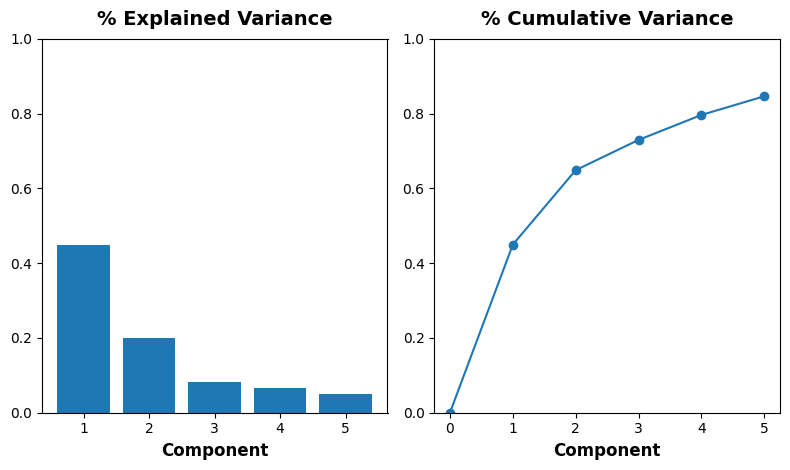

In [101]:
plot_variance(pca)

### 5.1.2 Cercle de corrélation

Source du code : https://github.com/LeCoinStat/100JoursDeML/blob/main/06_Apprentissage_Non_Supervis%C3%A9/01_Kmeans_Python.ipynb

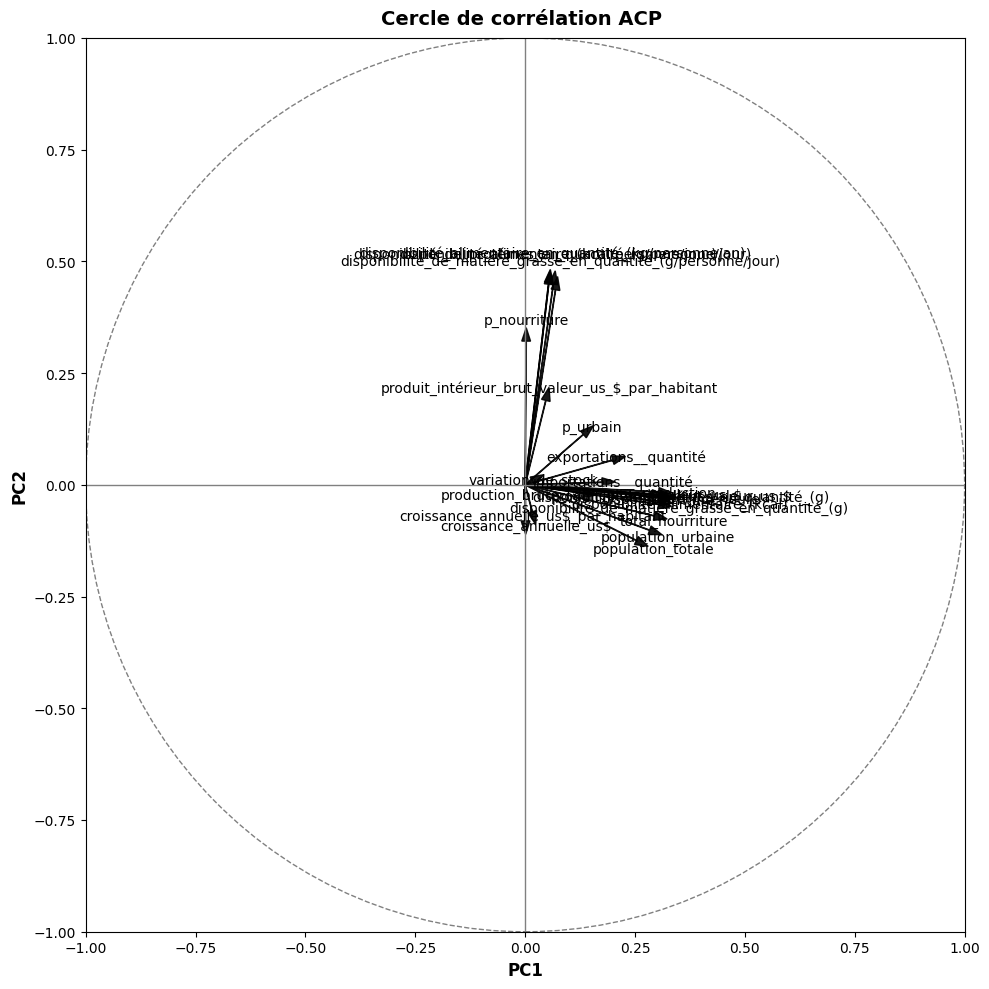

In [127]:
# Créer le cercle de corrélation
coeff = pca.components_.T
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, df_merged_pca.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP ')

# Afficher la figure
plt.show()

### 5.1.3 Ajout de feature

In [103]:
# Ajout de PC1 au df 
df_finally_2 = df_finally.reset_index().join(X_pca_df.PC1).set_index('Zone')

## 5.2  DataFrame Test 

In [104]:
df_test1 = df_finally_2[['disponibilité_alimentaire_(kcal)',
       'disponibilité_alimentaire_(kcal/personne/jour)',
       'disponibilité_alimentaire_en_quantité_(kg/personne/an)',
       'disponibilité_de_matière_grasse_en_quantité_(g)',
       'disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)',
       'disponibilité_de_protéines_en_quantité_(g)',
       'disponibilité_de_protéines_en_quantité_(g/personne/jour)',
       'disponibilité_intérieure', 'exportations__quantité',
       'importations__quantité', 'nourriture', 'production',
       'variation_de_stock', 'total_nourriture', 'p_nourriture',
       'croissance_annuelle_us$', 'croissance_annuelle_us$_par_habitant',
       'production_brute_(agriculture)_valeur_us_$',
       'produit_intérieur_brut_valeur_us_$',
       'produit_intérieur_brut_valeur_us_$_par_habitant',
       'population_totale', 'population_urbaine', 'p_urbain','PC1']]
df_test1.shape

(185, 24)

In [105]:
dft1 = df_test1[['disponibilité_alimentaire_(kcal/personne/jour)','disponibilité_intérieure', 'exportations__quantité',
       'importations__quantité', 'nourriture', 'production', 'p_nourriture',
       'produit_intérieur_brut_valeur_us_$_par_habitant',
                 'disponibilité_de_protéines_en_quantité_(g/personne/jour)','PC1',
       'p_urbain']]
dft1_scaled = (dft1 - dft1.mean(axis=0)) / dft1.std(axis=0)
dft1_scaled.describe()

,disponibilité_alimentaire_(kcal/personne/jour),disponibilité_intérieure,exportations__quantité,importations__quantité,nourriture,production,p_nourriture,produit_intérieur_brut_valeur_us_$_par_habitant,disponibilité_de_protéines_en_quantité_(g/personne/jour),PC1,p_urbain
count,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02
mean,-4.800964e-17,1.920386e-17,3.120627e-17,7.681543e-17,2.880579e-17,-4.800964e-18,3.456694e-16,9.601929e-17,-8.641736e-17,-9.601929e-18,-1.536309e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.213266e+00,-2.888541e-01,-2.326426e-01,-4.351549e-01,-2.835612e-01,-2.782752e-01,-1.916495e+00,-7.068615e-01,-1.244433e+00,-4.611046e-01,-1.818968e+00
25%,-8.689191e-01,-2.779859e-01,-2.326426e-01,-4.180298e-01,-2.730456e-01,-2.748019e-01,-8.276920e-01,-6.227234e-01,-8.685760e-01,-3.441272e-01,-7.100445e-01
50%,-2.052874e-01,-2.492541e-01,-2.326426e-01,-3.526429e-01,-2.450864e-01,-2.551200e-01,-1.120597e-01,-4.100138e-01,-1.417305e-01,-2.253218e-01,-7.862731e-02
75%,5.403242e-01,-1.658068e-01,-2.027918e-01,-3.972019e-02,-1.638069e-01,-1.792870e-01,8.082762e-01,1.595604e-01,6.597213e-01,-8.550878e-02,8.162519e-01
max,2.765944e+00,7.593293e+00,8.971852e+00,7.219776e+00,7.662657e+00,7.489112e+00,2.715337e+00,5.038089e+00,3.727055e+00,7.686220e+00,2.369021e+00


version UE et hors UE

In [106]:
dft1_reset =dft1.reset_index()

In [107]:
liste_euro = [
    "Allemagne",
    "Autriche",
    "Belgique",
    "Bulgarie",
    "Chypre",
    "Croatie",
    "Danemark",
    "Espagne",
    "Estonie",
    "Finlande",
    "France",
    "Grèce",
    "Hongrie",
    "Irlande",
    "Italie",
    "Lettonie",
    "Lituanie",
    "Luxembourg",
    "Malte",
    "Pays-Bas",
    "Pologne",
    "Portugal",
    "République tchèque",
    "Roumanie",
    "Slovaquie",
    "Slovénie",
    "Suède",
    "Pays-Bas (Royaume des)",
    "Suisse"
]

In [108]:
# Creating 2 dataframes : out of UE and within
dft1_ue = dft1_reset[dft1_reset.Zone.isin(liste_euro)].groupby(['Zone'])[['disponibilité_intérieure', 'exportations__quantité',
       'importations__quantité', 'nourriture', 'production', 'p_nourriture',
       'produit_intérieur_brut_valeur_us_$_par_habitant',
       'p_urbain']].mean()
dft1_hors_ue = dft1_reset[~dft1_reset.Zone.isin(liste_euro)].groupby(['Zone'])[['disponibilité_intérieure', 'exportations__quantité',
       'importations__quantité', 'nourriture', 'production', 'p_nourriture',
       'produit_intérieur_brut_valeur_us_$_par_habitant',
       'p_urbain']].mean()

In [109]:
# Scaling those
dft1_ue_scaled = (dft1_ue - dft1_ue.mean(axis=0)) / dft1_ue.std(axis=0)
dft1_hors_ue_scaled = (dft1_hors_ue - dft1_hors_ue.mean(axis=0)) / dft1_hors_ue.std(axis=0)

# 6. Modèles

On testera les modèles suivants : CHA, DB SCAN, K means

In [110]:
def countries_by_cluster(dft, cluster_col='cluster'): 
    for i in dft[cluster_col].unique():
        print(f' Cluster {i} : {dft[dft[cluster_col] == i].index}')

In [111]:
def plot_cluster(dft, x, y,cluster_col='cluster'):
    sns.relplot(
        x=x, y=y, hue=cluster_col, data=dft, height=6,
    );

In [112]:
def cha_cluster(dft,dft_scaled, n_clusters = 4):
    cah = AgglomerativeClustering(n_clusters)
    dft['cluster_cah'] = cah.fit_predict(dft_scaled)
    return dft

In [113]:
def dbscan_cluster(dft,dft_scaled, eps= 0.5):
    dbscan = DBSCAN(eps=eps)
    dft['cluster_dbscan'] = dbscan.fit_predict(dft_scaled)
    return dft

In [114]:
def kmeans_cluster(dft,dft_scaled, n_clusters = 4):
    kmeans_df = KMeans(n_clusters=n_clusters, n_init = 'auto')
    dft['cluster'] = kmeans_df.fit_predict(dft_scaled)
    return dft

In [115]:
def plot_elbow(df_scaled)  : 
    """
    pandas.DataFrame -> None
    """
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    K = range(1, 10)
 
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k, n_init='auto').fit(dft1_scaled)
        kmeanModel.fit(dft1_scaled)
 
        distortions.append(sum(np.min(cdist(dft1_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / dft1_scaled.shape[0])
        inertias.append(kmeanModel.inertia_)
 
        mapping1[k] = sum(np.min(cdist(dft1_scaled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / dft1_scaled.shape[0]
        mapping2[k] = kmeanModel.inertia_

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

## 6.0 DBSCAN

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_13108\2439853319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['cluster_dbscan'] = dbscan.fit_predict(dft_scaled)
C:\Users\Utilisateur\anaconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


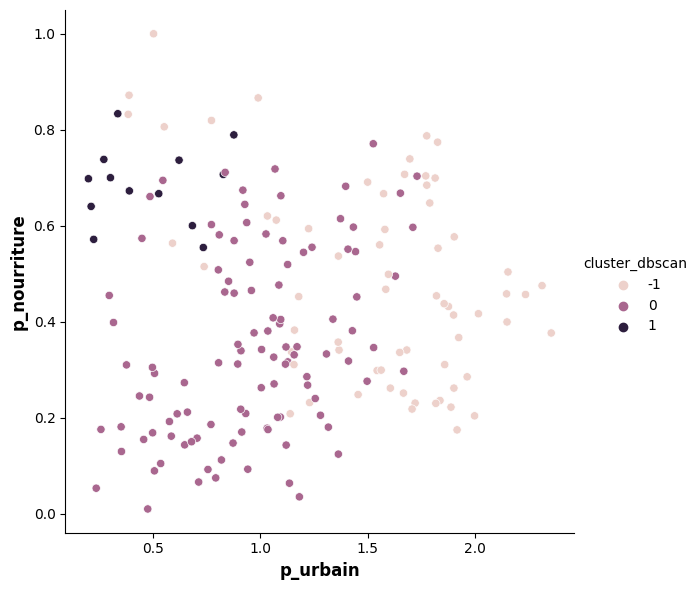

In [116]:
dft1 = dbscan_cluster(dft1, dft1_scaled, eps = 1)
plot_cluster(dft1,"p_urbain", "p_nourriture","cluster_dbscan")

In [117]:
countries_by_cluster(dft1, 'cluster_dbscan')

 Cluster 0 : Index(['Afghanistan', 'Albanie', 'Angola', 'Arménie', 'Azerbaïdjan',
       'Bangladesh', 'Bhoutan', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie',
       ...
       'Turkménistan', 'Vanuatu', 'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe',
       'Égypte', 'Équateur', 'Éthiopie', 'Îles Salomon'],
      dtype='object', name='Zone', length=107)
 Cluster -1 : Index(['Afrique du Sud', 'Algérie', 'Allemagne', 'Arabie saoudite',
       'Argentine', 'Australie', 'Autriche', 'Bahamas', 'Bahreïn', 'Belgique',
       'Belize', 'Bolivie (État plurinational de)', 'Brésil', 'Canada',
       'Chili', 'Chine', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Colombie', 'Cuba', 'Danemark', 'Espagne',
       'Finlande', 'France', 'Fédération de Russie', 'Guyana', 'Inde',
       'Indonésie', 'Iran (République islamique d')', 'Iraq', 'Irlande',
       'Islande', 'Israël', 'Italie', 'Jamaïque', 'Japon', 'Koweït',
       'Luxembourg', 'Malaisie', 'Mexique', 'Myanma

In [118]:
dft1_scanned = dft1[dft1['cluster_dbscan'] == -1].drop(columns='cluster_dbscan')
dft1_scanned_scaled = (dft1_scanned - dft1_scanned.mean(axis=0)) / dft1_scanned.std(axis=0)

## 6.1 K-means

C:\Users\Utilisateur\anaconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


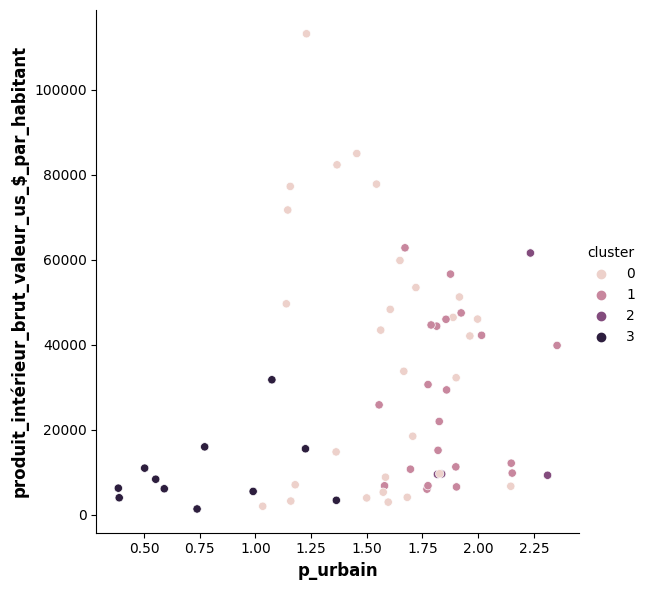

In [119]:
dft1_scanned = kmeans_cluster(dft1_scanned, dft1_scanned_scaled)
plot_cluster(dft1_scanned,"p_urbain", "produit_intérieur_brut_valeur_us_$_par_habitant")

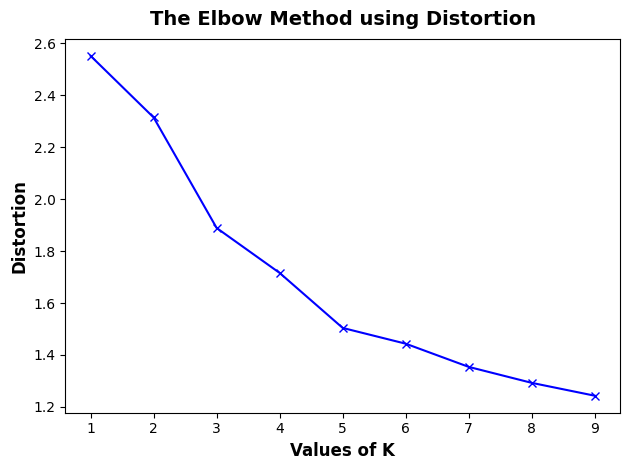

In [120]:
plot_elbow(dft1_scanned_scaled)

In [121]:
countries_by_cluster(dft1_scanned)

 Cluster 1 : Index(['Afrique du Sud', 'Arabie saoudite', 'Argentine', 'Australie',
       'Bahreïn', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong', 'Colombie',
       'Espagne', 'Fédération de Russie', 'Iran (République islamique d')',
       'Israël', 'Japon', 'Koweït', 'Malaisie', 'Mexique', 'Pérou', 'Qatar',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'Émirats arabes unis'],
      dtype='object', name='Zone')
 Cluster 0 : Index(['Algérie', 'Allemagne', 'Autriche', 'Belgique', 'Chine - RAS de Macao',
       'Cuba', 'Danemark', 'Finlande', 'France', 'Inde', 'Indonésie', 'Iraq',
       'Irlande', 'Islande', 'Italie', 'Luxembourg', 'Norvège',
       'Nouvelle-Zélande', 'Pays-Bas (Royaume des)', 'Philippines', 'Pologne',
       'République de Corée', 'Suisse', 'Suède', 'Thaïlande', 'Turquie',
       'Ukraine', 'Uruguay', 'Venezuela (République bolivarienne du)'],
      dtype='object', name='Zone')
 Cluster 3 : Index(['Bahamas', 'Belize', 'Bolivie (État plurinatio

### Clustering pour l' UE

Par le précédent cluster , on a pu déterminer un Cluster contenant une premiere approche de la liste finale des pays potentiels.
Toutefois , exporter au sein de l'UE n'offre pas les mêmes contraintes que ce soit logistiques ou commerciales. </br>
On souhaite donc effectuer un second clustering, sur les memes critères mais uniquement avec les pays de l'UE. Et un autre avec uniquement les pays hors UE. </br>
PS : On incluera la Suisse dans ce classement*

C:\Users\Utilisateur\anaconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


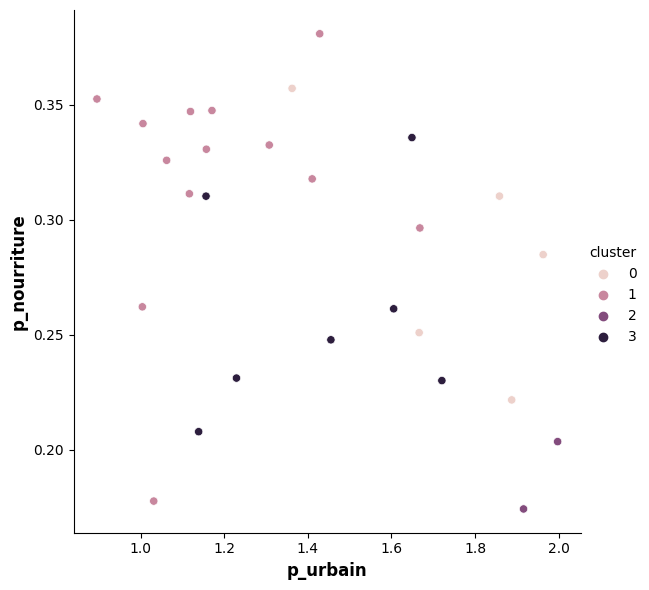

In [122]:
dft1_ue = kmeans_cluster(dft1_ue, dft1_ue_scaled, n_clusters= 4)
plot_cluster(dft1_ue,"p_urbain", "p_nourriture")

In [123]:
countries_by_cluster(dft1_ue)

 Cluster 0 : Index(['Allemagne', 'Espagne', 'France', 'Italie', 'Pologne'], dtype='object', name='Zone')
 Cluster 3 : Index(['Autriche', 'Danemark', 'Finlande', 'Irlande', 'Luxembourg', 'Suisse',
       'Suède'],
      dtype='object', name='Zone')
 Cluster 2 : Index(['Belgique', 'Pays-Bas (Royaume des)'], dtype='object', name='Zone')
 Cluster 1 : Index(['Bulgarie', 'Chypre', 'Croatie', 'Estonie', 'Grèce', 'Hongrie',
       'Lettonie', 'Lituanie', 'Malte', 'Portugal', 'Roumanie', 'Slovaquie',
       'Slovénie'],
      dtype='object', name='Zone')


<b> Analyse des clusters </b> </br>
Cluster 2 : Pays importateurs et producteurs </br>
Cluster 3 : Cibles </br>
Cluster 0 et 1 : Non interessant </br>

### Clustering out of UE

C:\Users\Utilisateur\anaconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


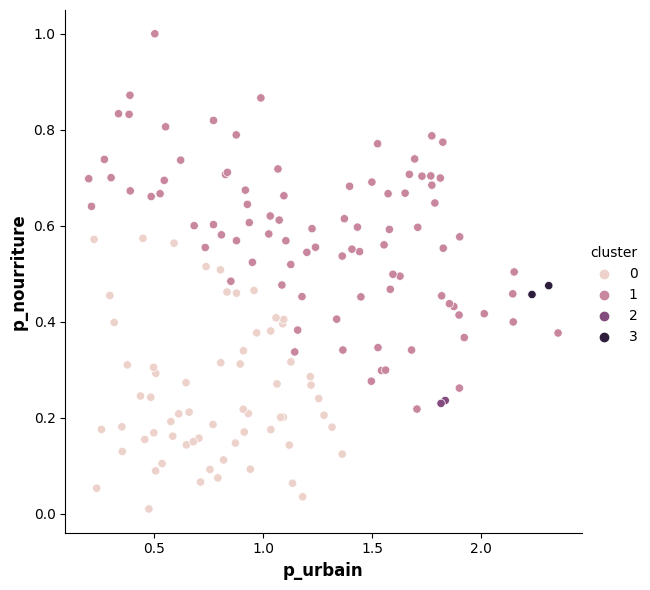

In [124]:
dft1_hors_ue = kmeans_cluster(dft1_hors_ue, dft1_hors_ue_scaled)
plot_cluster(dft1_hors_ue,"p_urbain", "p_nourriture")

In [125]:
countries_by_cluster(dft1_hors_ue)

 Cluster 0 : Index(['Afghanistan', 'Albanie', 'Arménie', 'Azerbaïdjan', 'Bangladesh',
       'Belize', 'Bhoutan', 'Bosnie-Herzégovine', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cambodge', 'Cameroun', 'Comores', 'Côte d'Ivoire',
       'Djibouti', 'Eswatini', 'Guinée', 'Guinée-Bissau', 'Kazakhstan',
       'Kenya', 'Kirghizistan', 'Lesotho', 'Madagascar', 'Malawi', 'Mali',
       'Mauritanie', 'Micronésie (États fédérés de)', 'Mongolie', 'Monténégro',
       'Mozambique', 'Myanmar', 'Namibie', 'Niger', 'Nigéria', 'Népal',
       'Ouganda', 'Ouzbékistan', 'Pakistan', 'Papouasie-Nouvelle-Guinée',
       'Paraguay', 'Rwanda', 'République arabe syrienne',
       'République centrafricaine', 'République de Moldova',
       'République démocratique du Congo',
       'République démocratique populaire lao',
       'République populaire démocratique de Corée',
       'République-Unie de Tanzanie', 'Serbie', 'Sierra Leone', 'Soudan',
       'Soudan du Sud', 'Sénégal', 'Tadjikistan', 'Tchad

# 7. Bilan

In [126]:
listing_hors_UE = ['Arabie saoudite', 'Australie', 'Canada', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Islande', 'Israël', 'Japon', 'Koweït',
       'Mexique', 'Norvège', 'Nouvelle-Zélande', 'Qatar',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'République de Corée', 'Émirats arabes unis']
listing_UE  = ['Allemagne', 'Espagne', 'France', 'Italie', 'Pologne','Autriche', 'Belgique', 'Croatie', 'Danemark', 'Finlande', 'Irlande',
       'Luxembourg', 'Suisse', 'Suède']
liste_globale = ['Allemagne', 'Autriche', 'Belgique', 'Chine - RAS de Macao', 'Danemark',
       'Espagne', 'Finlande', 'France', 'Irlande', 'Islande', 'Italie',
       'Japon', 'Luxembourg', 'Norvège', 'Nouvelle-Zélande',
       'Pays-Bas (Royaume des)',
       'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord',
       'République de Corée', 'Suisse', 'Suède', 'Uruguay',
       'Émirats arabes unis']
liste_big_market  = ['Brésil', 'Chine' ,'États-Unis d\'Amérique']
liste_finale = []

for country in listing_hors_UE : 
    if country in liste_globale:
        liste_finale.append(country)
for country in listing_UE : 
    if country in liste_globale:
        liste_finale.append(country)
# A laquelle on ajoutera la liste big_market
liste_finale

['Chine - RAS de Macao',
 'Islande',
 'Japon',
 'Norvège',
 'Nouvelle-Zélande',
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
 'République de Corée',
 'Émirats arabes unis',
 'Allemagne',
 'Espagne',
 'France',
 'Italie',
 'Autriche',
 'Belgique',
 'Danemark',
 'Finlande',
 'Irlande',
 'Luxembourg',
 'Suisse',
 'Suède']